###Problem Statement
*Geely Auto* is a Chinese automobile company that aims to set up its vehicle production line in both the United States and Europe. To compete in the foreign market with an appropriate pricing strategy effectively, it is essential to comprehend the correlation between vehicle features and the manufacturer's suggested retail price (MSRP). By targeting this goal, the primary focus of this capstone project lies in thoroughly studying the US and European automotive markets, assisting Geely Auto in developing efficient pricing and marketing decisions.

### Data Dictionary

1.   Car_ID > Unique id of each observation (*Interger*)
2.   Symboling > Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe (*Categorical*)
3. carCompany > Name of car company (*Categorical*)  
4. fueltype > Car fuel type i.e gas or diesel (*Categorical*)
5. aspiration > Aspiration used in a car (*Categorical*)
6. doornumber > Number of doors in a car (*Categorical*)
7. carbody > body of car (*Categorical*)
8. drivewheel > type of drive wheel (*Categorical*)
9. enginelocation > Location of car engine (*Categorical*)
10. wheelbase > Wheelbase of car (*Numeric*)
11. carlength > Length of car (*Numeric*)
12. carwidth > Width of car (*Numeric*)
13. carheight > height of car (*Numeric*)
14. curbweight > The weight of a car without occupants or baggage (*Numeric*)
15. enginetype > Type of engine (*Categorical*)
16. cylindernumber > cylinder placed in the car (*Categorical*)
17. enginesize > Size of car (*Numeric*)
18. fuelsystem > Fuel system of car (*Categorical*)  
19. boreratio > Boreratio of car (*Numeric*)
20. stroke > Stroke or volume inside the engine (*Numeric*)
21. compressionratio > compression ratio of car (*Numeric*)
22. horsepower > Horsepower (*Numeric*)
23. peakrpm > car peak rpm (*Numeric*)
24. citympg > Mileage in city (*Numeric*)
25. highwaympg > Mileage on highway (*Numeric*)
26. price (Dependent variable) > Price of car (*Numeric*)



#Exploratory data analysis

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

In [151]:
#Bootstrapping - 1000 rows [Done]
#Linear - backward elimination [Done]
#Tree & Rf & Gradient (Grid Search) [Done]

In [152]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [153]:
car.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [154]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Check duplicate values

In [155]:
car.duplicated().sum()

0

### Check the unique value for each column

In [156]:
columns = car.columns
for c in columns:
  print(c,car[c].unique())
  print('_'*80)

car_ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
________________________________________________________________________________
symboling [ 3  1  2  0 -1 -2]
_________________________________________________

### Check null/missing values for each column

In [157]:
pd.DataFrame({'Columns':car.columns,'Missing Value T/F':car.columns.isna()})
#No missing values

Columns  Missing Value T/F
0             car_ID              False
1          symboling              False
2            CarName              False
3           fueltype              False
4         aspiration              False
5         doornumber              False
6            carbody              False
7         drivewheel              False
8     enginelocation              False
9          wheelbase              False
10         carlength              False
11          carwidth              False
12         carheight              False
13        curbweight              False
14        enginetype              False
15    cylindernumber              False
16        enginesize              False
17        fuelsystem              False
18         boreratio              False
19            stroke              False
20  compressionratio              False
21        horsepower              False
22           peakrpm              False
23           citympg              False
24        highwaympg              False
25             price              False

### Extract car models from CarName

In [158]:
car['CarModel'] = car['CarName'].str.split(' ').str[1] #Car Models
car['CarModel'].unique() #Class A/B/C

array(['giulia', 'stelvio', 'Quadrifoglio', '100', '100ls', 'fox', '5000',
       '4000', '5000s', '320i', 'x1', 'x3', 'z4', 'x4', 'x5', 'impala',
       'monte', 'vega', 'rampage', 'challenger', 'd200', 'monaco', 'colt',
       'coronet', 'dart', 'civic', 'accord', 'prelude', 'MU-X', 'D-Max',
       'xj', 'xf', 'xk', 'rx3', 'glc', 'rx2', 'rx-4', '626', 'rx-7',
       'electra', 'century', 'skyhawk', 'opel', 'skylark', 'regal',
       'cougar', 'mirage', 'lancer', 'outlander', 'g4', 'montero',
       'pajero', 'versa', 'gt-r', 'rogue', 'latio', 'titan', 'leaf',
       'juke', 'note', 'clipper', 'nv200', 'dayz', 'fuga', 'otti',
       'teana', 'kicks', '504', '304', '604sl', '505s', 'fury', 'cricket',
       'satellite', 'valiant', 'duster', 'macan', 'panamera', 'cayenne',
       'boxter', '12tl', '5', '99e', '99le', '99gle', nan, 'dl', 'brz',
       'baja', 'r1', 'r2', 'trezia', 'tribeca', 'corona', 'corolla',
       'carina', 'mark', 'celica', 'starlet', 'tercel', 'cressida',
       '

### Extract car brands from CarName

In [159]:
car['CarName'] = car['CarName'].str.split(' ').str[0] #Car Brands
car['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Adjust the typos

In [160]:
car['CarName'] = car['CarName'].replace({'alfa-romero':'alfa_romeo','maxda':'mazda','Nissan':'nissan',
                                           'porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen',
                                           'vw':'volkswagen'})
car['CarName'].unique()

array(['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [161]:
car['CarName'] = car['CarName'].str.capitalize() #Change the first character to uppercase
car['CarModel'] = car['CarModel'].str.capitalize()

### Eliminate reductant column

In [162]:
car = car.drop(columns= ('car_ID')) #They are too unique (high cardinality)

###Rearrange columns

In [163]:
car_model = car.pop('CarModel')
car.insert(car.columns.get_loc('CarName') + 1, 'CarModel', car_model)
car.head()

symboling     CarName      CarModel fueltype aspiration doornumber  \
0          3  Alfa_romeo        Giulia      gas        std        two   
1          3  Alfa_romeo       Stelvio      gas        std        two   
2          1  Alfa_romeo  Quadrifoglio      gas        std        two   
3          2        Audi           100      gas        std       four   
4          2        Audi         100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

### Bootstrapping

In [164]:
car = car.sample(1000,replace = True,ignore_index = True)
car.head()

symboling CarName CarModel fueltype aspiration doornumber    carbody  \
0          0   Mazda      626      gas        std       four  hatchback   
1          0   Mazda     Rx-7   diesel        std       four      sedan   
2          0  Toyota     Mark      gas        std       four      sedan   
3          0   Mazda      Glc   diesel        std       four      sedan   
4          1  Toyota  Corolla      gas        std        two      sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        fwd          front       98.8      177.8      66.5       55.5   
1        rwd          front      104.9      175.0      66.1       54.4   
2        fwd          front       95.7      166.3      64.4       53.0   
3        fwd          front       98.8      177.8      66.5       55.5   
4        rwd          front       94.5      168.7      64.0       52.6   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2425        ohc           four         122       2bbl       3.39   
1        2700        ohc           four         134        idi       3.43   
2        2081        ohc           four          98       2bbl       3.19   
3        2443        ohc           four         122        idi       3.39   
4        2169        ohc           four          98       2bbl       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    3.39               8.6          84     4800       26          32  11245.0  
1    3.64              22.0          72     4200       31          39  18344.0  
2    3.03               9.0          70     4800       30          37   6938.0  
3    3.39              22.7          64     4650       36          42  10795.0  
4    3.03               9.0          70     4800       29          34   8058.0

In [165]:
car.shape

(1000, 26)

### Bar Chart - Count the number of each car brand (Categorical)

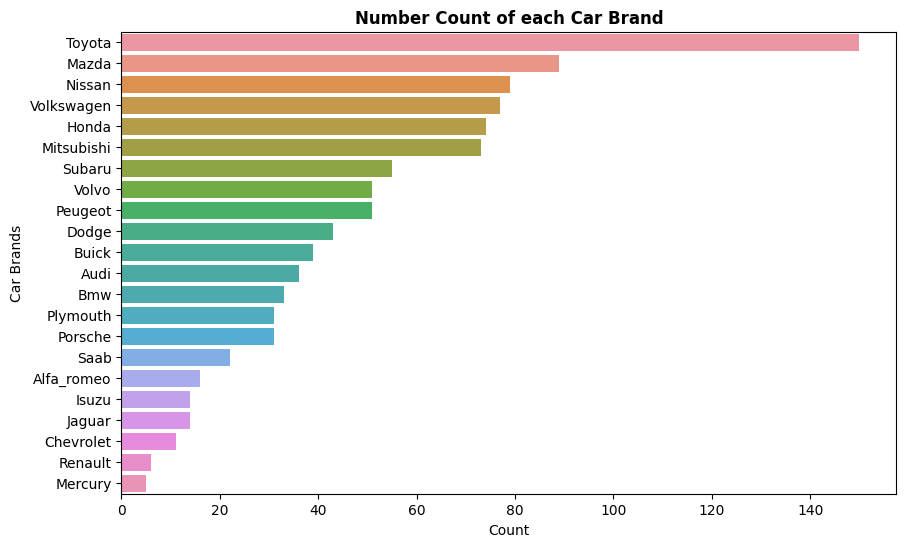

In [166]:
plt.subplots(figsize=(10,6))
sns.countplot(data= car, y='CarName', order = car['CarName'].value_counts().index.tolist(), orient='h')
plt.title('Number Count of each Car Brand',fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Car Brands')
plt.show()

###Bar Chart Summary
Toyota has the highest count, while Mercury has the lowest.

###The brand with the highest price on average

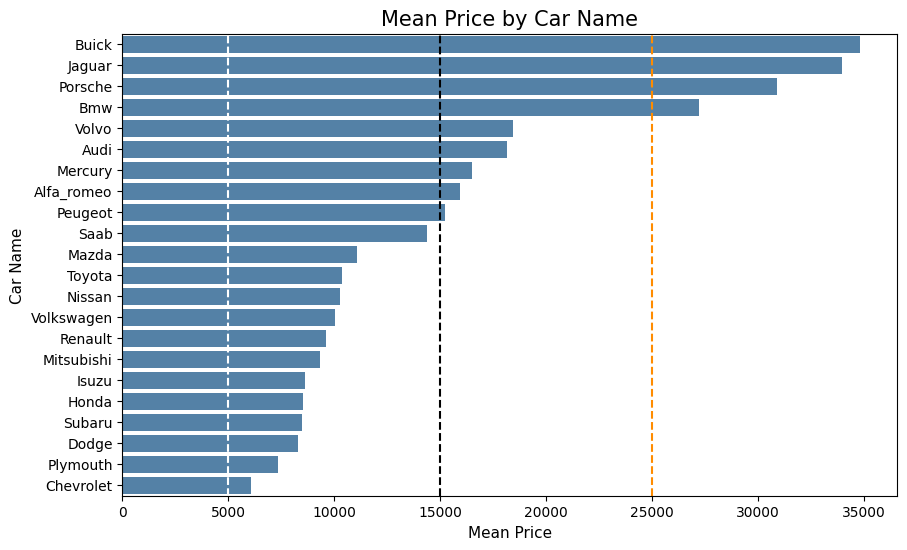

In [167]:
car_mean = car.groupby('CarName')['price'].mean().reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=car_mean, x = 'price', y = 'CarName', color = 'steelblue',orient = 'h')
plt.xlabel('Mean Price', fontsize=11)
plt.ylabel('Car Name', fontsize=11)
plt.title('Mean Price by Car Name', fontsize=15)
plt.axvline(x = 5000, color = 'white', linestyle='dashed')
plt.axvline(x = 15000, color = 'black', linestyle='dashed')
plt.axvline(x = 25000, color = 'darkorange', linestyle='dashed')
plt.show()

**Jaguar**, **Buick**, and **Porsche** are the top three car brands with prices over $30,000 on average. (Pass the orange vertical line)

### Classify Car Models with Bins Variable

In [168]:
car_upperbound = car['price'].max()+1 #Avoid max value being left out
classify_bins = [5000,15000,25000, car_upperbound]
classify_labels = ['Affordable', 'Mid_Range', 'Luxury']
car['CarClass'] = pd.cut(car['price'], bins = classify_bins, labels = classify_labels, right=False)
car['CarClass'] = car['CarClass'].astype('object') #Change the data type from categorical to object
car.head()

symboling CarName CarModel fueltype aspiration doornumber    carbody  \
0          0   Mazda      626      gas        std       four  hatchback   
1          0   Mazda     Rx-7   diesel        std       four      sedan   
2          0  Toyota     Mark      gas        std       four      sedan   
3          0   Mazda      Glc   diesel        std       four      sedan   
4          1  Toyota  Corolla      gas        std        two      sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        fwd          front       98.8      177.8      66.5       55.5   
1        rwd          front      104.9      175.0      66.1       54.4   
2        fwd          front       95.7      166.3      64.4       53.0   
3        fwd          front       98.8      177.8      66.5       55.5   
4        rwd          front       94.5      168.7      64.0       52.6   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2425        ohc           four         122       2bbl       3.39   
1        2700        ohc           four         134        idi       3.43   
2        2081        ohc           four          98       2bbl       3.19   
3        2443        ohc           four         122        idi       3.39   
4        2169        ohc           four          98       2bbl       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    3.39               8.6          84     4800       26          32   
1    3.64              22.0          72     4200       31          39   
2    3.03               9.0          70     4800       30          37   
3    3.39              22.7          64     4650       36          42   
4    3.03               9.0          70     4800       29          34   

     price    CarClass  
0  11245.0  Affordable  
1  18344.0   Mid_Range  
2   6938.0  Affordable  
3  10795.0  Affordable  
4   8058.0  Affordable

### Car Class Summary

*   5,000 ~ 15,000 = **Affordable**
*   15,000 ~ 25,000 = **Mid_Range**

*   25,000 ~ 45,001 = **Luxury**






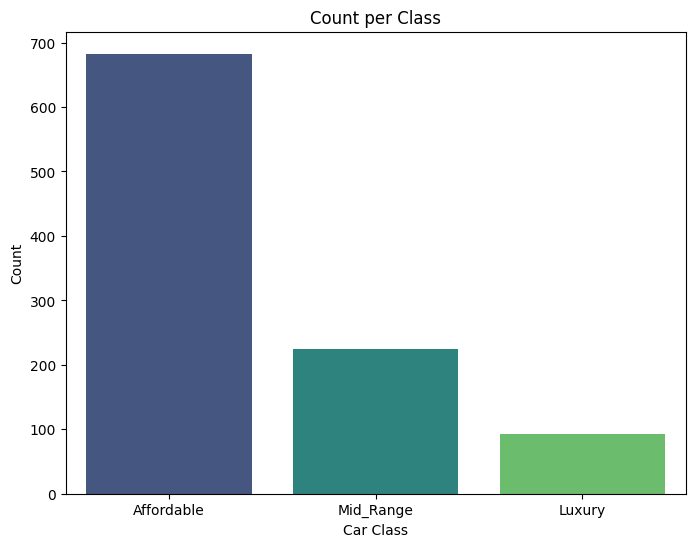

In [169]:
class_bins = car['CarClass'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_bins.index, y=class_bins.values, palette='viridis')
plt.xlabel('Car Class')
plt.ylabel('Count')
plt.title('Count per Class')
plt.show()

We can see that the affordable class is roughly **2.6** times bigger than the mid-range class, while the mid-range class is **2.5** times larger than the luxury class.

### Car Prices vs Car Models by Brands

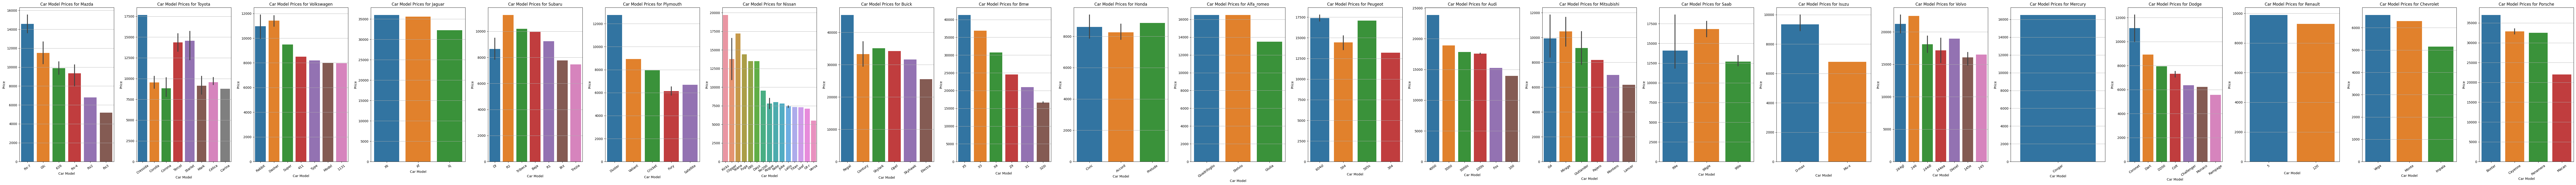

In [170]:
car_brands = car['CarName'].unique()
fig, axes = plt.subplots(1, len(car_brands), figsize = (5*len(car_brands),8))

for idx, brand in enumerate(car_brands):
    brand_data = car[car['CarName'] == brand].sort_values(by = 'price', ascending = False)
    sns.barplot(x = 'CarModel', y = 'price', data = brand_data, ax = axes[idx])
    axes[idx].set_xlabel('Car Model')
    axes[idx].set_ylabel('Price')
    axes[idx].set_title(f'Car Model Prices for {brand}')
    axes[idx].tick_params(axis='x', rotation=35)
    axes[idx].tick_params(axis='y')
    axes[idx].grid(axis='y')
plt.tight_layout()
plt.show()

### Skewness check

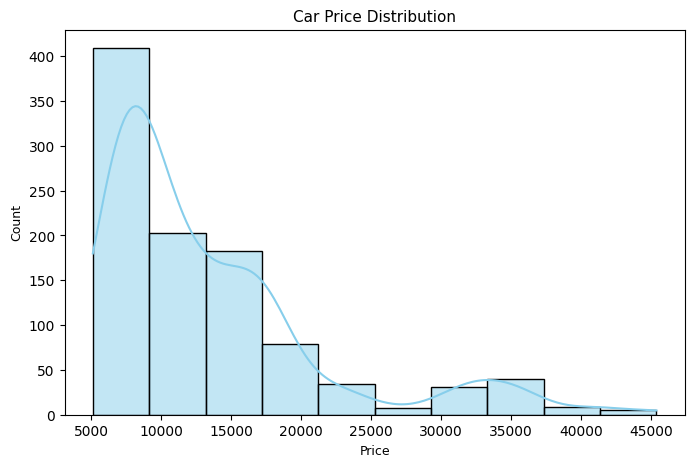

In [171]:
plt.figure(figsize=(8, 5))
sns.histplot(car['price'], bins=10, kde=True, color='skyblue')
plt.xlabel('Price', fontsize=9)
plt.ylabel('Count', fontsize=9)
plt.title('Car Price Distribution', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.set_style('whitegrid')
plt.show()

###Skewness Summary
This graph shows the **right-skewed** data of car price distribution, representing more values falling on the left side and fewer data points on the right side.

### Visualize categorical variables (Cont.)

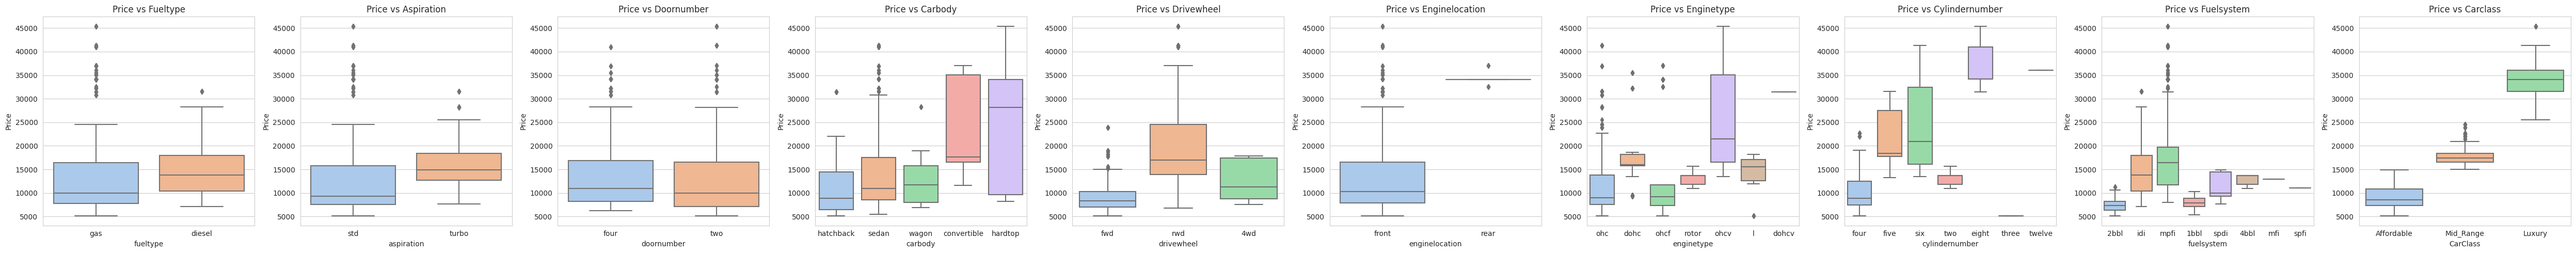

In [172]:
cat_var = car.select_dtypes(include=['object']).drop(columns=['CarName','CarModel'])
cat_length = len(cat_var.columns)

fig, axes = plt.subplots(1, cat_length, figsize=(5*cat_length, 5))

for i, column in enumerate(cat_var):
    sns.boxplot(data = car, x = column, y = 'price', palette='pastel', ax = axes[i])
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Price', fontsize=10)
    axes[i].set_title(f'Price vs {column.capitalize()}', fontsize=12)
plt.tight_layout()
plt.show()

### Categorical summary


*   Vehicles powered by diesel fuel are more expensive than those using gas fuel
*   Cars equipped with turbo are more pricey than standard engine

*   Door numbers have no significant impact on the price
*   Convertible and hardtop bodies demand higher prices than all other types of car bodies


*   Cars with rear-wheel drive system are way more expensive than those with front-wheel and all-wheel drive
*   Rear engine location is associated with tremendously higher prices than cars with front engine


*   OHCV cars (overhead valve camshaft) are located in the highest price range than other engine type
*   Cars equipped with 8 cylinders appear to be the most expensive features


*   MPFI and IDI are found in the higher price range than the rest of the fuel systems












### Visualize numeric variables

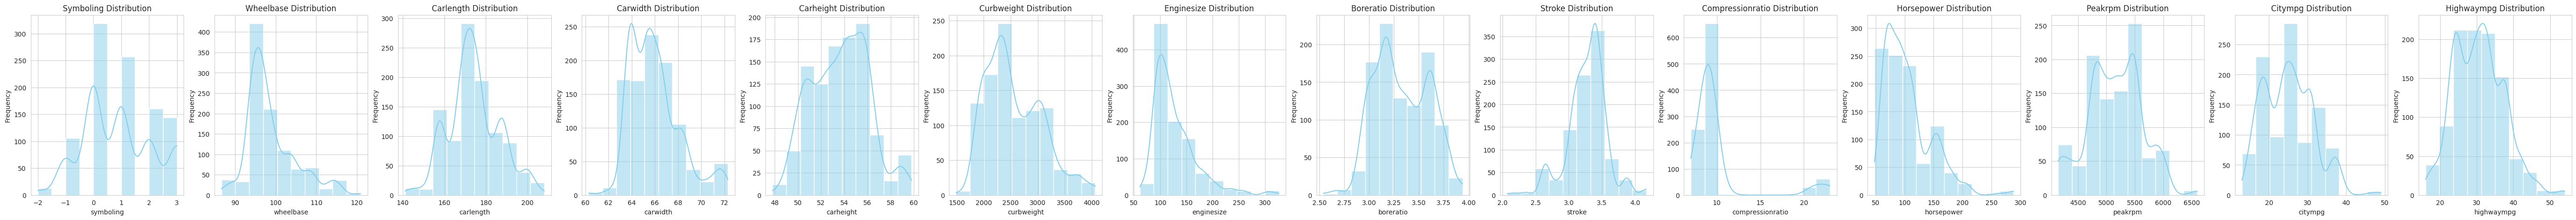

In [173]:
numeric_var = car.select_dtypes(exclude=['object']).drop(columns='price')
plot_length = len(numeric_var.columns)

fig, axes = plt.subplots(1, plot_length, figsize=(5*plot_length, 5))

for i, column in enumerate(numeric_var):
    sns.histplot(data = car, x = column, bins = 10, kde = True, color = 'skyblue', ax = axes[i])
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].set_title(f'{column.capitalize()} Distribution', fontsize=12)

plt.show()

### Check the correlation between the car features and price (Numeric)

<ipython-input-174-4a68f4ba2795>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



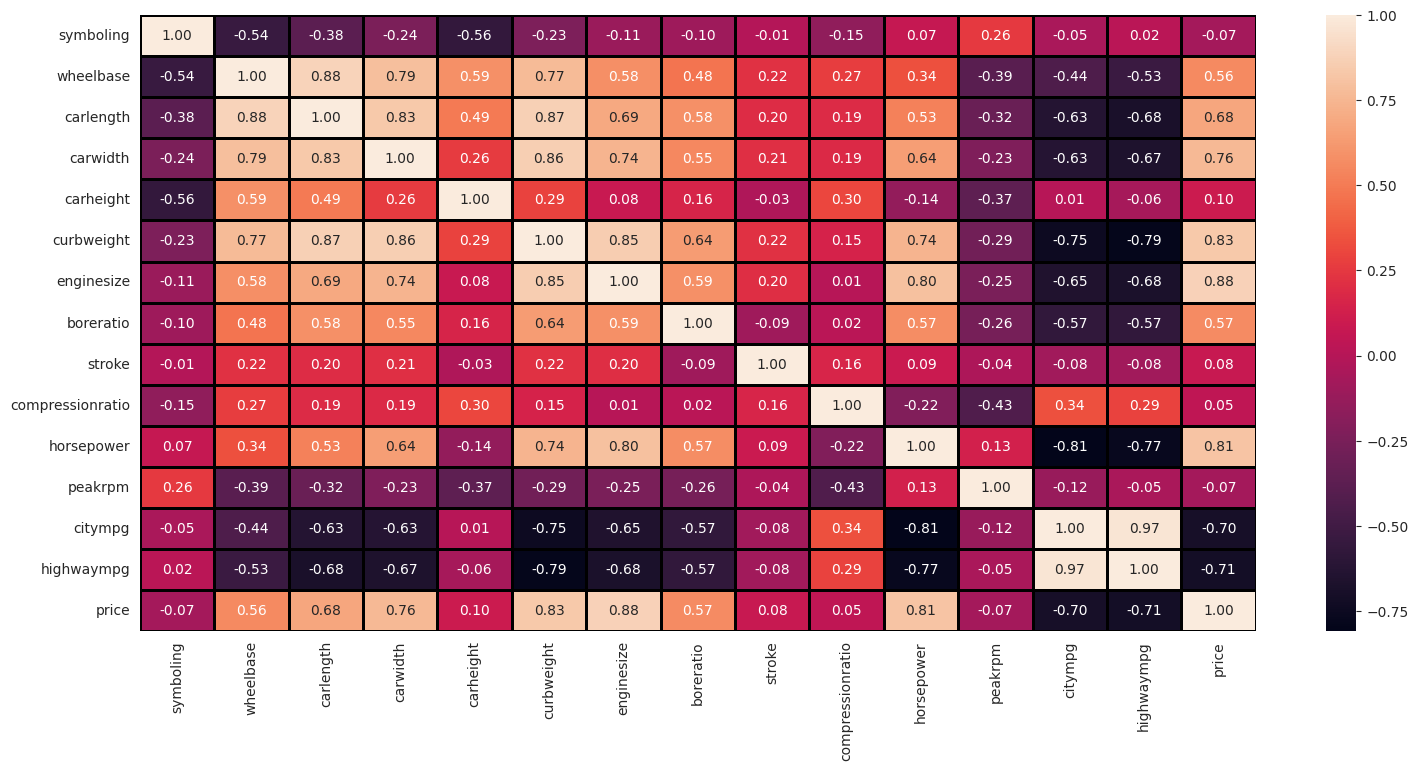

In [174]:
plt.figure(figsize = (18, 8))
sns.heatmap(car.corr(), annot = True, fmt = '0.2f',linewidth = 1, linecolor = 'black')
plt.show()

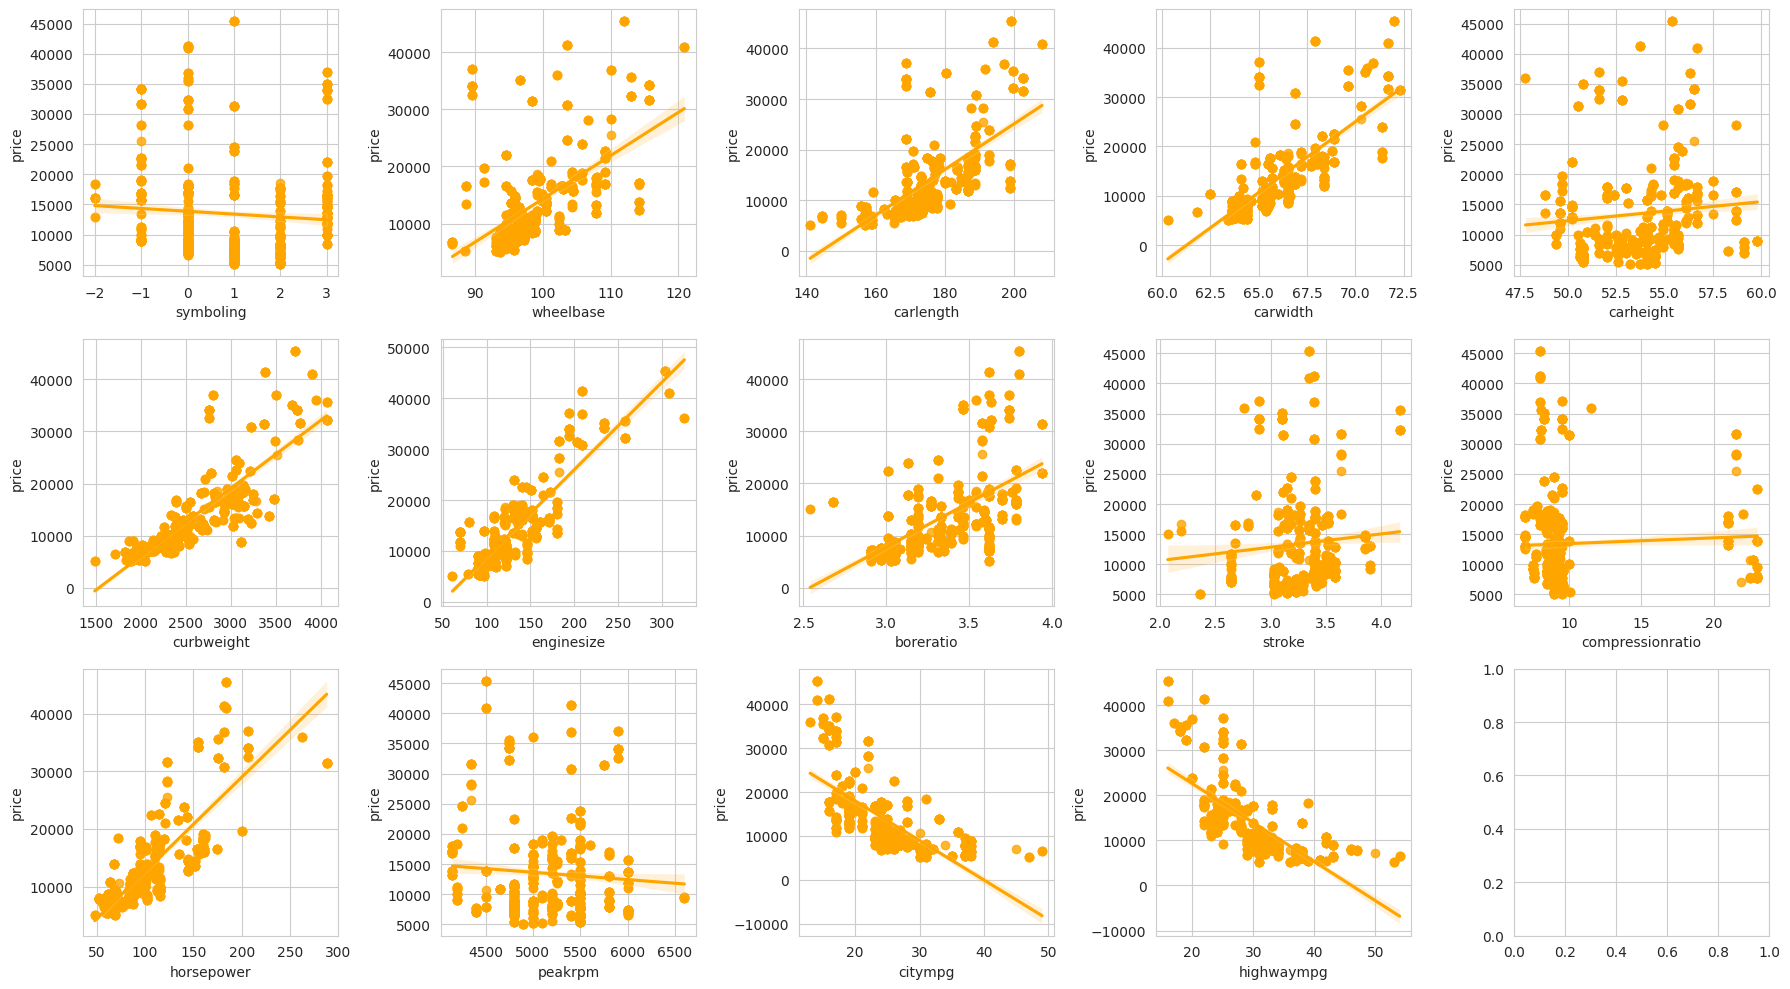

In [175]:
numeric_columns = car.select_dtypes(include=['int64', 'float64']).drop(columns='price')
fig,axes = plt.subplots(3,5,figsize=(18,10))
for space,num_col in enumerate(numeric_columns[:len(numeric_columns)-1]):
    x,y = space // 5,space % 5
    sns.regplot(x = num_col, y= 'price', data=car, ax=axes[x][y], color='orange')

plt.tight_layout(h_pad=1, w_pad=1)
plt.show()

###Numeric Summary

*   Carlength, Carwidth, Curbweight, Enginesize, and horsepower have high positive correlation with price (all > 0.6)
*   Citympg and Highwaympg have high negative correlation with price (both < -0.6)

**Strong Positive Correlation Features with Price**
*   Wheelbase, carlength, carwidth, curbweight
*   Horsepower, enginesize, borreratio

**Weak Positive Correlation Features with Price**
*   Carheight, Stroke, Compressionratio

**Strong Negative Correlation Features with Price**
*   Citympg, Highwaympg

**Weak Negative Correlation Features with Price**
*   Symboling, Peakrpm












### Box plot - Check outliers in our target variable (Price)

In [176]:
px.box(data_frame = car, y = 'price', width=700, height=600)
#template = 'plotly_dark'

In [299]:
(car['price']>28200).sum()

88

###Outliers Summary
There are 88 data points outside the maximum price range that can be classified as outliers. We intend to keep these prices in our dataset and apply a scaling method later during the analysis.

### Export the CSV for Visualization Purposes

In [178]:
car.to_csv('clean_car.csv', index=False)

###Exclude Non-correlated Variables
**Categorical**
*   Door Number

**Numeric**
*   Symboling
*   Stroke
*   Compressionratio





### Create Dummies Variables

In [179]:
predictors = ['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype',
              'cylindernumber','fuelsystem','CarClass']
outcome = 'price'

In [180]:
X = pd.get_dummies(car[predictors],drop_first = True)
y = car[outcome]

In [181]:
car = pd.concat([car, X],axis=1) #Combine dummies with the original car dataset
car.head()

symboling CarName CarModel fueltype aspiration doornumber    carbody  \
0          0   Mazda      626      gas        std       four  hatchback   
1          0   Mazda     Rx-7   diesel        std       four      sedan   
2          0  Toyota     Mark      gas        std       four      sedan   
3          0   Mazda      Glc   diesel        std       four      sedan   
4          1  Toyota  Corolla      gas        std        two      sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        fwd          front       98.8      177.8      66.5       55.5   
1        rwd          front      104.9      175.0      66.1       54.4   
2        fwd          front       95.7      166.3      64.4       53.0   
3        fwd          front       98.8      177.8      66.5       55.5   
4        rwd          front       94.5      168.7      64.0       52.6   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2425        ohc           four         122       2bbl       3.39   
1        2700        ohc           four         134        idi       3.43   
2        2081        ohc           four          98       2bbl       3.19   
3        2443        ohc           four         122        idi       3.39   
4        2169        ohc           four          98       2bbl       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    3.39               8.6          84     4800       26          32   
1    3.64              22.0          72     4200       31          39   
2    3.03               9.0          70     4800       30          37   
3    3.39              22.7          64     4650       36          42   
4    3.03               9.0          70     4800       29          34   

     price    CarClass  fueltype_gas  aspiration_turbo  carbody_hardtop  \
0  11245.0  Affordable             1                 0                0   
1  18344.0   Mid_Range             0                 0                0   
2   6938.0  Affordable             1                 0                0   
3  10795.0  Affordable             0                 0                0   
4   8058.0  Affordable             1                 0                0   

   carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  \
0                  1              0              0               1   
1                  0              1              0               0   
2                  0              1              0               1   
3                  0              1              0               1   
4                  0              1              0               0   

   drivewheel_rwd  enginelocation_rear  enginetype_dohcv  enginetype_l  \
0               0                    0                 0             0   
1               1                    0                 0             0   
2               0                    0                 0             0   
3               0                    0                 0             0   
4               1                    0                 0             0   

   enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
0               1                0                0                 0   
1               1                0                0                 0   
2               1                0                0                 0   
3               1                0                0                 0   
4               1                0                0                 0   

   cylindernumber_five  cylindernumber_four  cylindernumber_six  \
0                    0                    1                   0   
1                    0                    1                   0   
2                    0                    1                   0   
3                    0                    1                   0   
4                    0                    1                   0   

   cylindernumber_three  cylindernumber_twelve

In [182]:
new_predictors = ['symboling','CarName','CarModel','doornumber','fueltype','aspiration','carbody','drivewheel',
                  'enginelocation','enginetype','cylindernumber','fuelsystem','CarClass','stroke','compressionratio']
car.drop(new_predictors, axis = 1, inplace = True) #Combine new dummies with existing numeric variables
car.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       98.8      177.8      66.5       55.5        2425         122   
1      104.9      175.0      66.1       54.4        2700         134   
2       95.7      166.3      64.4       53.0        2081          98   
3       98.8      177.8      66.5       55.5        2443         122   
4       94.5      168.7      64.0       52.6        2169          98   

   boreratio  horsepower  peakrpm  citympg  highwaympg    price  fueltype_gas  \
0       3.39          84     4800       26          32  11245.0             1   
1       3.43          72     4200       31          39  18344.0             0   
2       3.19          70     4800       30          37   6938.0             1   
3       3.39          64     4650       36          42  10795.0             0   
4       3.19          70     4800       29          34   8058.0             1   

   aspiration_turbo  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0                 0                0                  1              0   
1                 0                0                  0              1   
2                 0                0                  0              1   
3                 0                0                  0              1   
4                 0                0                  0              1   

   carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginelocation_rear  \
0              0               1               0                    0   
1              0               0               1                    0   
2              0               1               0                    0   
3              0               1               0                    0   
4              0               0               1                    0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  \
0                 0             0               1                0   
1                 0             0               1                0   
2                 0             0               1                0   
3                 0             0               1                0   
4                 0             0               1                0   

   enginetype_ohcv  enginetype_rotor  cylindernumber_five  \
0                0                 0                    0   
1                0                 0                    0   
2                0                 0                    0   
3                0                 0                    0   
4                0                 0                    0   

   cylindernumber_four  cylindernumber_six  cylindernumber_three  \
0                    1                   0                     0   
1                    1                   0                     0   
2                    1                   0                     0   
3                    1                   0                     0   
4                    1                   0                     0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                      0                   0                1   
1                      0                   0                0   
2                      0                   0                1   
3                      0                   0                0   
4                      0                   0                1   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                0   
1                0               1               0                0   
2                0               0               0                0   
3                0               1               0                0   
4                0               0               0                0   

   fuelsystem_spdi  fuelsystem_spfi  CarClass_Luxury  CarClass_Mid_Range  
0                0                0                0                   0  
1                0                

In [183]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              1000 non-null   float64
 1   carlength              1000 non-null   float64
 2   carwidth               1000 non-null   float64
 3   carheight              1000 non-null   float64
 4   curbweight             1000 non-null   int64  
 5   enginesize             1000 non-null   int64  
 6   boreratio              1000 non-null   float64
 7   horsepower             1000 non-null   int64  
 8   peakrpm                1000 non-null   int64  
 9   citympg                1000 non-null   int64  
 10  highwaympg             1000 non-null   int64  
 11  price                  1000 non-null   float64
 12  fueltype_gas           1000 non-null   uint8  
 13  aspiration_turbo       1000 non-null   uint8  
 14  carbody_hardtop        1000 non-null   uint8  
 15  carbo

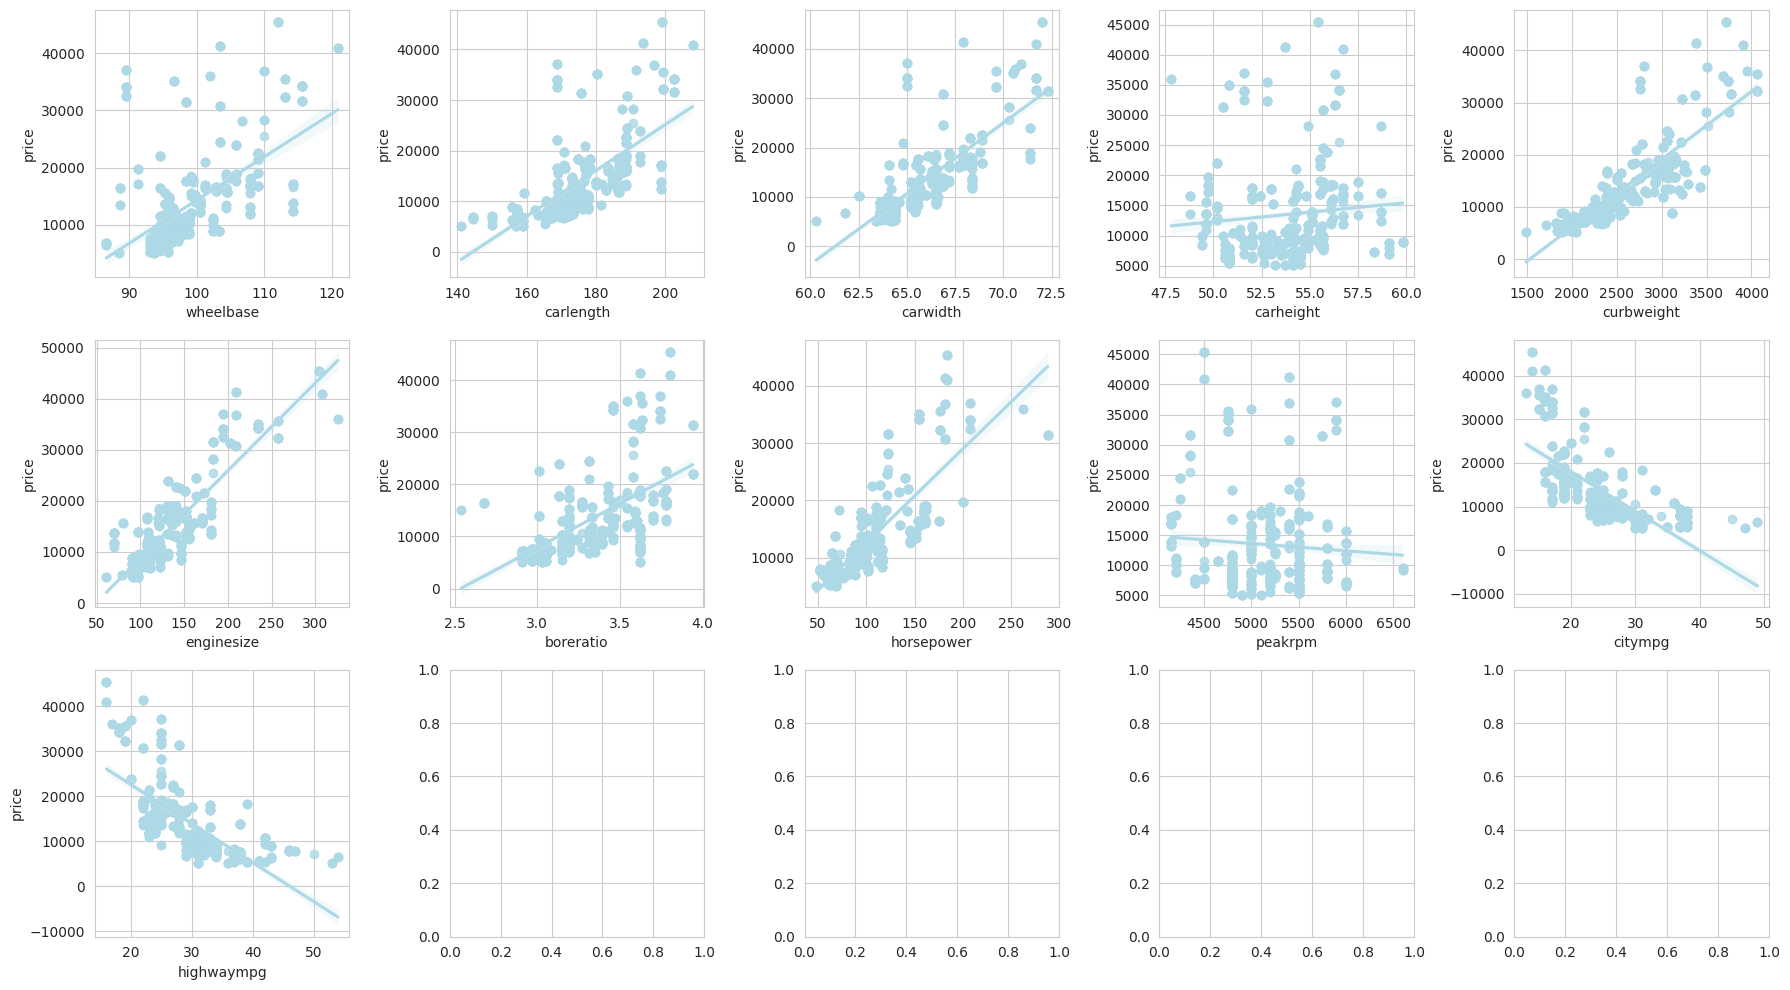

In [184]:
new_num_columns = car.select_dtypes(include=['int64', 'float64']).drop(columns='price')
fig,axes = plt.subplots(3,5,figsize=(18,10))
for space,num_col in enumerate(new_num_columns[:len(new_num_columns)-1]):
    x,y = space // 5,space % 5
    sns.regplot(x = num_col, y= 'price', data=car, ax=axes[x][y], color='lightblue')

plt.tight_layout(h_pad=1, w_pad=1)
plt.show()
#Data looks good for linear relationship

###Modeling

1.   Linear Regression
2.   Decision Trees
1.   Random Forest
2.   Gradient Boosting




In [185]:
pd.set_option('display.max_columns', None)
car.head()

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       98.8      177.8      66.5       55.5        2425         122   
1      104.9      175.0      66.1       54.4        2700         134   
2       95.7      166.3      64.4       53.0        2081          98   
3       98.8      177.8      66.5       55.5        2443         122   
4       94.5      168.7      64.0       52.6        2169          98   

   boreratio  horsepower  peakrpm  citympg  highwaympg    price  fueltype_gas  \
0       3.39          84     4800       26          32  11245.0             1   
1       3.43          72     4200       31          39  18344.0             0   
2       3.19          70     4800       30          37   6938.0             1   
3       3.39          64     4650       36          42  10795.0             0   
4       3.19          70     4800       29          34   8058.0             1   

   aspiration_turbo  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0                 0                0                  1              0   
1                 0                0                  0              1   
2                 0                0                  0              1   
3                 0                0                  0              1   
4                 0                0                  0              1   

   carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginelocation_rear  \
0              0               1               0                    0   
1              0               0               1                    0   
2              0               1               0                    0   
3              0               1               0                    0   
4              0               0               1                    0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  \
0                 0             0               1                0   
1                 0             0               1                0   
2                 0             0               1                0   
3                 0             0               1                0   
4                 0             0               1                0   

   enginetype_ohcv  enginetype_rotor  cylindernumber_five  \
0                0                 0                    0   
1                0                 0                    0   
2                0                 0                    0   
3                0                 0                    0   
4                0                 0                    0   

   cylindernumber_four  cylindernumber_six  cylindernumber_three  \
0                    1                   0                     0   
1                    1                   0                     0   
2                    1                   0                     0   
3                    1                   0                     0   
4                    1                   0                     0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                      0                   0                1   
1                      0                   0                0   
2                      0                   0                1   
3                      0                   0                0   
4                      0                   0                1   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                0   
1                0               1               0                0   
2                0               0               0                0   
3                0               1               0                0   
4                0               0               0                0   

   fuelsystem_spdi  fuelsystem_spfi  CarClass_Luxury  CarClass_Mid_Range  
0                0                0                0                   0  
1                0                

In [186]:
X1 = car.drop(columns=['price'])
y1 = car['price']

Since we have 42 columns after creating dummy variables, let's use Recursive Feature Elimination (**RFE**) to remove the least important features from the car dataset.

In [187]:
linear_m = LinearRegression()
decision_t = DecisionTreeRegressor()
random_f = RandomForestRegressor()
gradient_b = GradientBoostingRegressor()

### **30** Selected Variables





In [188]:
rfe_linear = RFE(estimator=linear_m, n_features_to_select=30)
rfe_linear.fit(X1,y1)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [189]:
features_30_L = X1.columns[rfe_linear.support_]
features_30_L

Index(['carwidth', 'boreratio', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spfi', 'CarClass_Luxury',
       'CarClass_Mid_Range'],
      dtype='object')

### Data Splitting (70% vs 30% Train Test Split)

In [190]:
train_X1, valid_X1, train_y1, valid_y1 = train_test_split(X1[features_30_L],y1, test_size=0.3,random_state=1)

###Data Scaling - Standardization

In [191]:
useful_num = list(train_X1.select_dtypes(include=['int64', 'float64']))
scaler = StandardScaler()
train_X1[useful_num] = scaler.fit_transform(train_X1[useful_num])
valid_X1[useful_num] = scaler.fit_transform(valid_X1[useful_num])

In [192]:
train_y1_np = np.array(train_y1).reshape(-1, 1)
train_y1_minmax = scaler.fit_transform(train_y1_np)
train_y1_scaled = pd.Series(train_y1_minmax.flatten())

In [193]:
valid_y1_np = np.array(valid_y1).reshape(-1, 1)
valid_y1_minmax = scaler.fit_transform(valid_y1_np)
valid_y1_scaled = pd.Series(valid_y1_minmax.flatten())

### Linear Regression

In [194]:
linear_m.fit(train_X1,train_y1_scaled)

LinearRegression()

In [195]:
linear_summary = r2_score(valid_y1_scaled, linear_m.predict(valid_X1))
linear_summary

0.9533792228655746

###P-values

*   We only want to keep those variables with low p-value (< 0.05) to ensure they are statistically significant to the model.




In [196]:
list_train_y1_scaled = list(train_y1_scaled)
X_train_ols = sm.add_constant(train_X1)
lm_ols = sm.OLS(list_train_y1_scaled,X_train_ols).fit()
print(lm_ols.summary()) #y = Price

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     685.2
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:21:36   Log-Likelihood:                 192.40
No. Observations:                 700   AIC:                            -326.8
Df Residuals:                     671   BIC:                            -194.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

### Backward Elimination

*   
Create a loop to drop variables with the highest p-values one by one until all variables have p-values below 0.05




In [197]:
def backward_elimination(data, target, significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features) > 0):
        features_with_constant = sm.add_constant(data[features])
        p_values_fit = sm.OLS(list(target), features_with_constant).fit().pvalues[1:]
        max_p_value = p_values_fit.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values_fit.idxmax()
            features.remove(excluded_feature)
        else:
            break

    return features

selected_features = backward_elimination(X_train_ols, train_y1_scaled, significance_level = 0.05)
print(selected_features)

['const', 'carwidth', 'boreratio', 'highwaympg', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_ohc', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mpfi', 'CarClass_Luxury', 'CarClass_Mid_Range']


In [198]:
X_train_ols_back = sm.add_constant(X_train_ols[selected_features])
lm_ols_back = sm.OLS(list_train_y1_scaled,X_train_ols_back).fit()
print(lm_ols_back.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     833.3
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:21:36   Log-Likelihood:                 189.54
No. Observations:                 700   AIC:                            -331.1
Df Residuals:                     676   BIC:                            -221.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3164    

Double-Check to make sure every variable has p-values lower than 0.05

In [199]:
p_values = lm_ols_back.pvalues
high_p_var = p_values[p_values > 0.05]
print(high_p_var)

Series([], dtype: float64)


In [200]:
r_ols = lm_ols_back.rsquared
r_ols

0.9659324237442488

### Linear Equation

In [300]:
lm_equation = f'Linear Equation = {0.3164:.2f} + '
for i, (col_name1, coef) in enumerate(lm_ols_back.params.drop('const').items()):
    if i > 0:
        lm_equation += ' + '
    lm_equation += f'{coef:.2f} * {col_name1}'
print(lm_equation)

Linear Equation = 0.32 + 0.15 * carwidth + 0.09 * boreratio + -0.12 * highwaympg + 0.09 * fueltype_gas + 0.12 * aspiration_turbo + -0.23 * carbody_hardtop + -0.28 * carbody_hatchback + -0.20 * carbody_sedan + -0.25 * carbody_wagon + -0.10 * drivewheel_fwd + -0.10 * drivewheel_rwd + 0.49 * enginelocation_rear + -0.53 * enginetype_dohcv + 0.29 * enginetype_ohc + -0.25 * enginetype_rotor + -0.87 * cylindernumber_five + -0.73 * cylindernumber_four + -0.24 * cylindernumber_six + -0.25 * cylindernumber_two + -0.07 * fuelsystem_2bbl + 0.27 * fuelsystem_4bbl + 0.23 * fuelsystem_idi + 0.06 * fuelsystem_mpfi + 1.97 * CarClass_Luxury + 0.59 * CarClass_Mid_Range


Regression Summary

In [202]:
y_train_pred = lm_ols_back.predict(X_train_ols_back)

me = (list_train_y1_scaled - y_train_pred).mean()
mae = mean_absolute_error(list_train_y1_scaled, y_train_pred)
rmse = mean_squared_error(list_train_y1_scaled, y_train_pred, squared = False)
mpe = ((list_train_y1_scaled - y_train_pred) / list_train_y1_scaled).mean()
mape = (abs(list_train_y1_scaled - y_train_pred) / list_train_y1_scaled).mean()
print('Regression Summary - Scaled\n')
print(f"Mean Error (ME): {me:.3f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Percentage Error (MPE): {mpe:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}')
print('_'*50)
print('Regression Summary - Unscaled\n')

#Unscale the number for better interpretation
y_train_pred_original = scaler.inverse_transform(y_train_pred.to_numpy().reshape(-1, 1))
y_train_pred_original

me_uc = (list(train_y1) - y_train_pred_original).mean()
mae_uc = mean_absolute_error(list(train_y1), y_train_pred_original)
rmse_uc = mean_squared_error(list(train_y1), y_train_pred_original, squared=False)
mpe_uc = ((list(train_y1) - y_train_pred_original) / list(train_y1)).mean()
mape_uc = (abs(list(train_y1) - y_train_pred_original) / list(train_y1)).mean()

print(f"Mean Error (ME): {me_uc:.3f}")
print(f'Root Mean Squared Error (RMSE): {rmse_uc:.3f}')
print(f'Mean Absolute Error (MAE): {mae_uc:.3f}')
print(f'Mean Percentage Error (MPE): {mpe_uc:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_uc:.3f}')

Regression Summary - Scaled

Mean Error (ME): -0.000
Root Mean Squared Error (RMSE): 0.185
Mean Absolute Error (MAE): 0.130
Mean Percentage Error (MPE): -0.040
Mean Absolute Percentage Error (MAPE): 0.007
__________________________________________________
Regression Summary - Unscaled

Mean Error (ME): -355.952
Root Mean Squared Error (RMSE): 1535.472
Mean Absolute Error (MAE): 1125.645
Mean Percentage Error (MPE): -0.330
Mean Absolute Percentage Error (MAPE): 0.692


In [203]:
X_ols = sm.add_constant(valid_X1)
X_ols_new = X_ols[X_train_ols_back.columns]
y_predict = lm_ols_back.predict(X_ols_new)

In [204]:
unscaled_y_predict = scaler.inverse_transform(y_predict.values.reshape(-1,1))

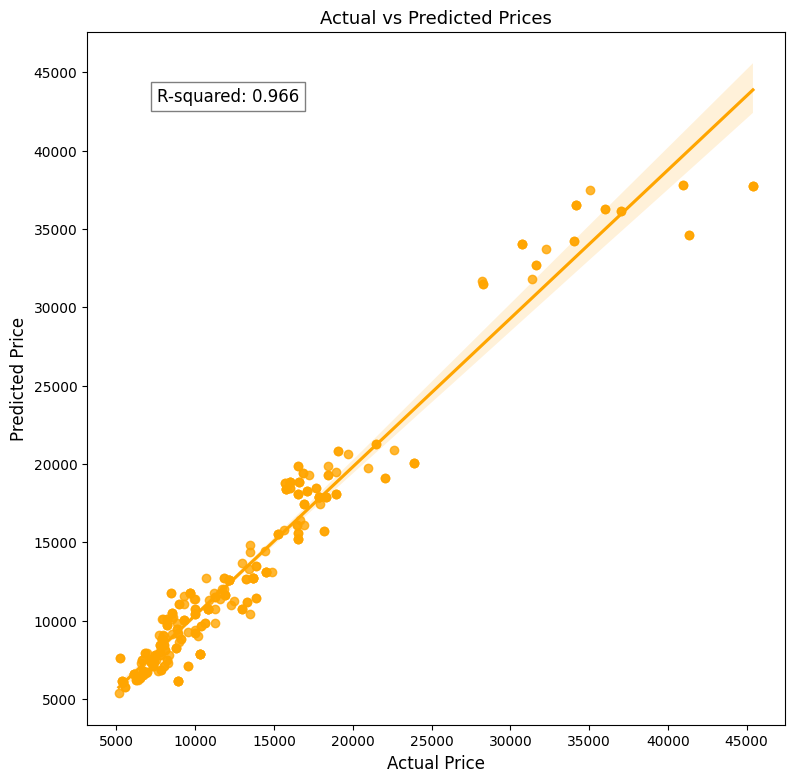

In [205]:
plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots(figsize=(9,9))
sns.regplot(x = valid_y1,y = unscaled_y_predict, color='orange', ax = ax)
plt.title('Actual vs Predicted Prices', fontsize=13)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.text(0.1, 0.9, f"R-squared: {r_ols:.3f}", transform = ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [206]:
lm_regression = pd.DataFrame({'Actual': valid_y1, 'Predicted': unscaled_y_predict.flatten()})
lm_regression

Actual     Predicted
507   7349.0   7119.787459
818  15750.0  18431.277476
452   5348.0   6168.484571
368   8921.0   9173.340549
242   7499.0   7493.079823
..       ...           ...
459  14489.0  13088.891444
415  17199.0  19315.874240
61    5389.0   6100.966475
347  30760.0  34046.025602
349   7395.0   7371.258223

[300 rows x 2 columns]

In [207]:
lm_regression.to_csv('lm_regression.csv', index=False)

### Decision Tree

In [208]:
rfe_tree = RFE(estimator = decision_t, n_features_to_select=30)
rfe_tree.fit(X1,y1)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=30)

In [209]:
features_30_D = X1.columns[rfe_tree.support_]
features_30_D

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mpfi', 'CarClass_Luxury', 'CarClass_Mid_Range'],
      dtype='object')

In [210]:
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X1[features_30_D],y1, test_size = 0.3,random_state = 1)

In [211]:
param_grid_dt = {
    'max_depth': [15],
    'min_samples_split': [5],
    'min_samples_leaf': [2]
} #Optimal Hyperparameter
gridsearch_dt = GridSearchCV(DecisionTreeRegressor(random_state = 1),param_grid_dt, cv = 5)
gridsearch_dt.fit(train_X2,train_y2)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [15], 'min_samples_leaf': [2],
                         'min_samples_split': [5]})

In [212]:
best_params_dt = gridsearch_dt.best_params_
best_estimator_dt = gridsearch_dt.best_estimator_

print(best_params_dt)
print(best_estimator_dt)

{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
DecisionTreeRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      random_state=1)


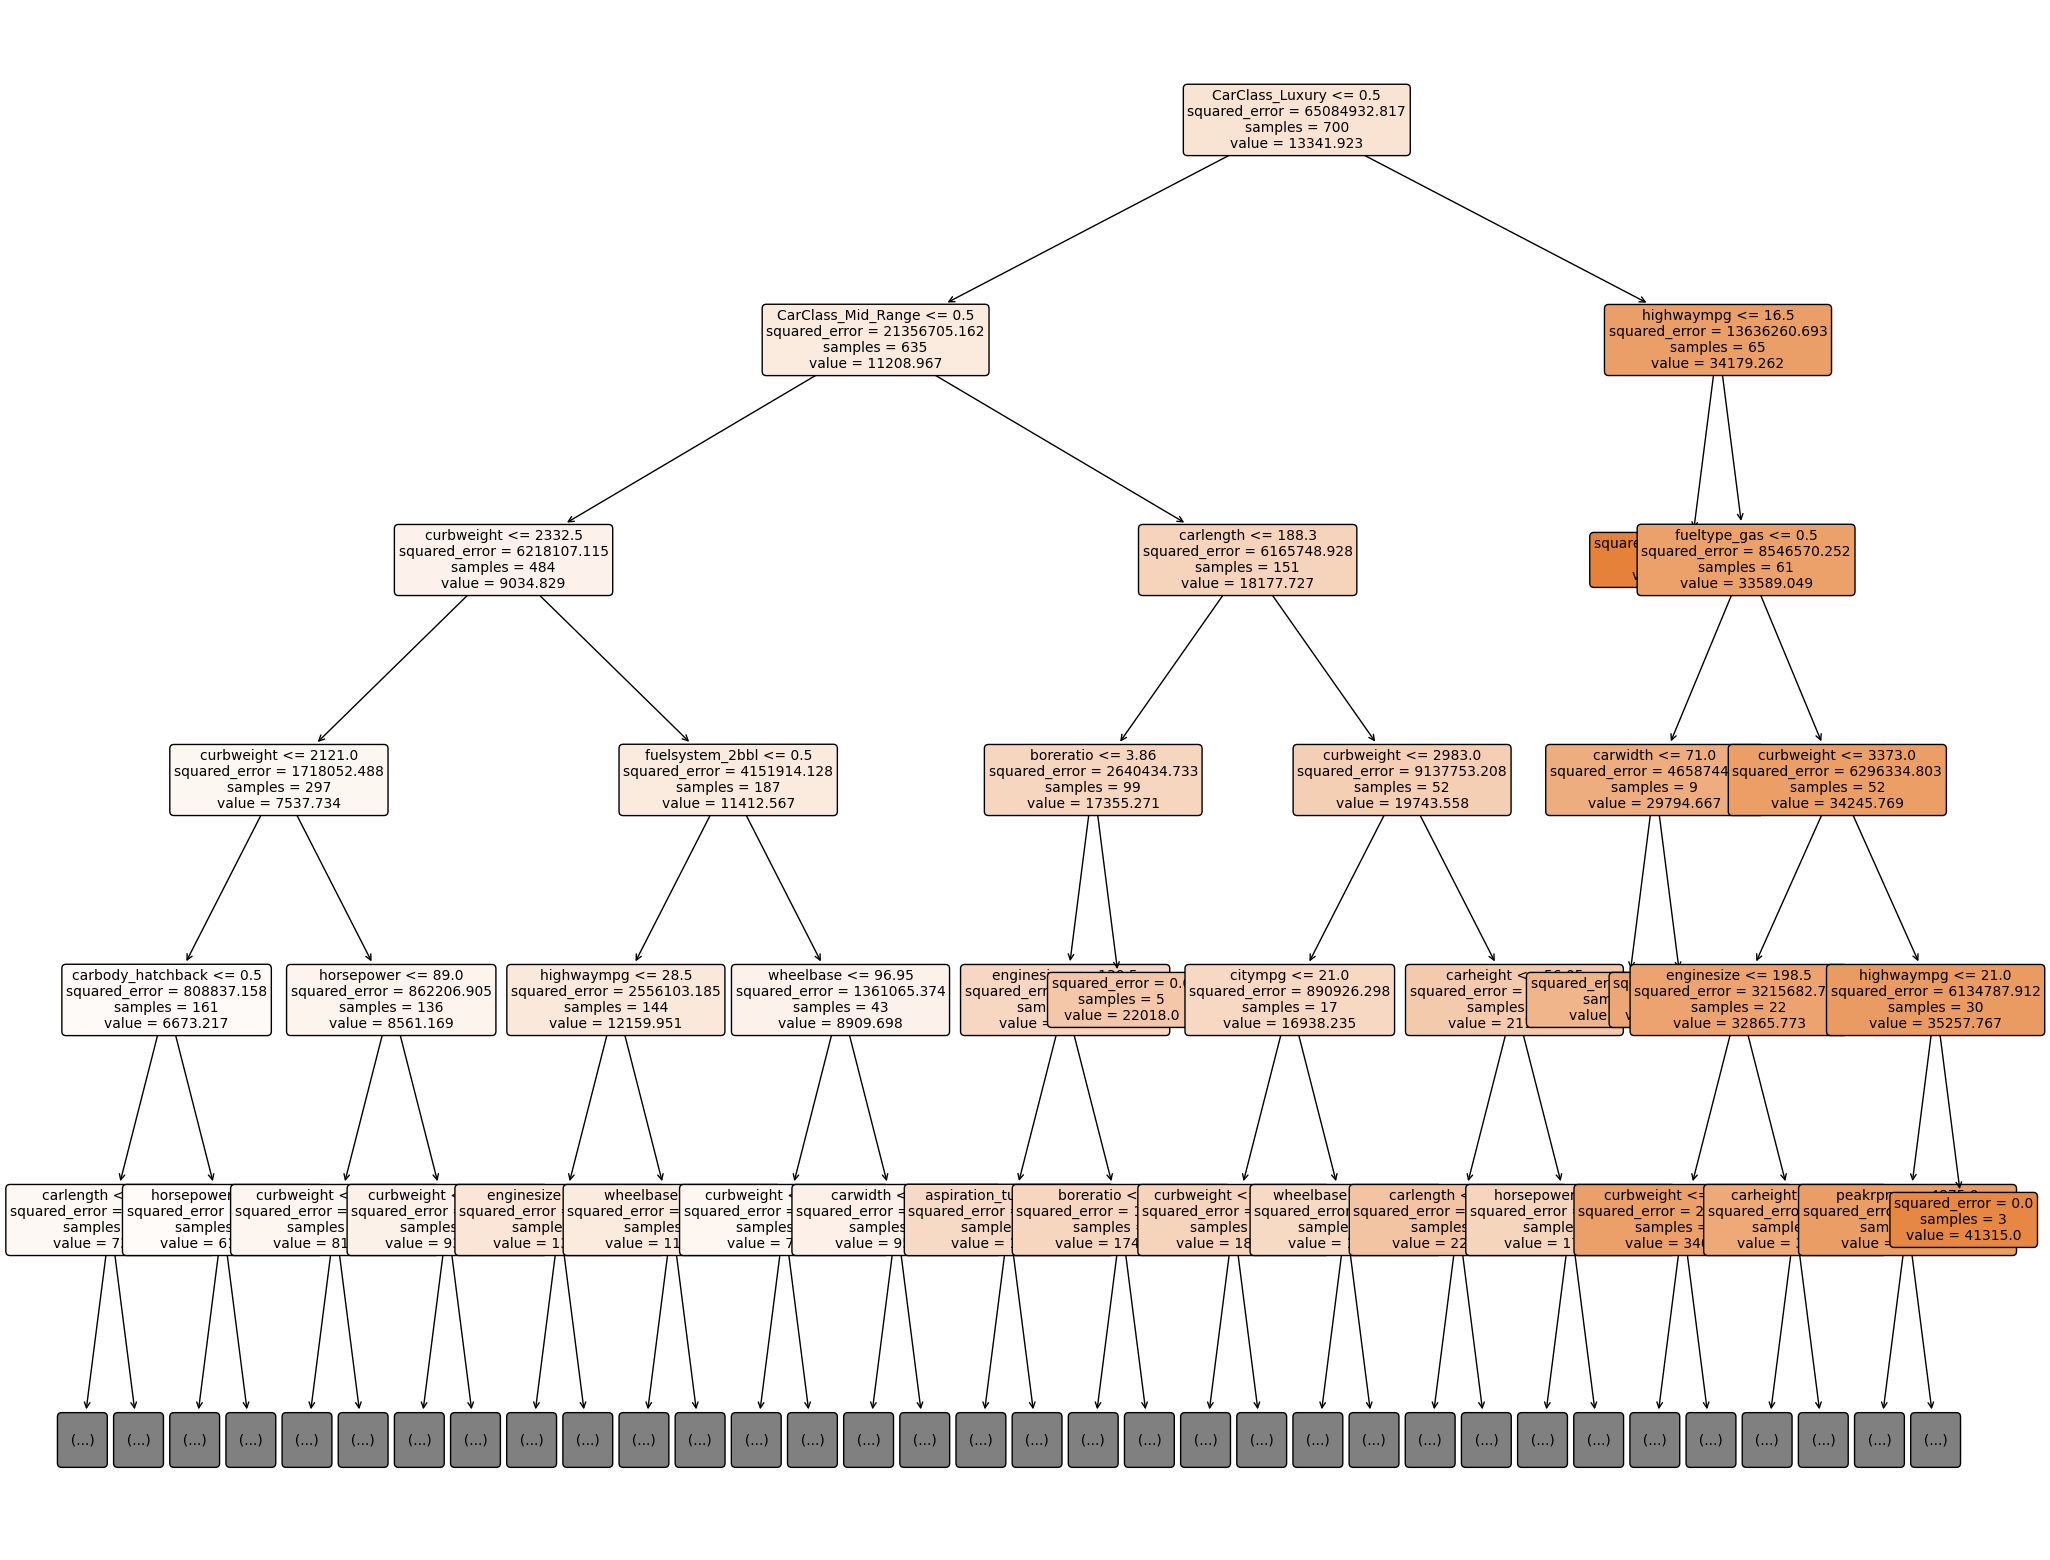

In [213]:
plt.figure(figsize=(25, 20)) #To avoid the tree nodes crammed together, set the max_depth to 5 for better visualization
plot_tree(best_estimator_dt, feature_names = valid_X2.columns, filled = True, rounded = True,
          max_depth = 5, fontsize = 10)
plt.show()

In [214]:
dt_summary = r2_score(valid_y2, best_estimator_dt.predict(valid_X2))
dt_summary

0.9977437553278784

In [215]:
regressionSummary(valid_y2,best_estimator_dt.predict(valid_X2))


Regression statistics

                      Mean Error (ME) : -2.1364
       Root Mean Squared Error (RMSE) : 388.8609
            Mean Absolute Error (MAE) : 123.8295
          Mean Percentage Error (MPE) : -0.1010
Mean Absolute Percentage Error (MAPE) : 0.8291


In [216]:
dt_regression = pd.DataFrame({'Actual': valid_y2, 'Predicted': best_estimator_dt.predict(valid_X2)})
dt_regression

Actual     Predicted
507   7349.0   7349.000000
818  15750.0  15750.000000
452   5348.0   5348.000000
368   8921.0   8921.000000
242   7499.0   7470.428571
..       ...           ...
459  14489.0  14489.000000
415  17199.0  17199.000000
61    5389.0   5389.000000
347  30760.0  30760.000000
349   7395.0   7247.000000

[300 rows x 2 columns]

In [217]:
dt_regression.to_csv('dt_regression.csv', index=False)

### Random Forest Model

In [218]:
rfe_rf = RFE(estimator = random_f, n_features_to_select=30)
rfe_rf.fit(X1,y1)

RFE(estimator=RandomForestRegressor(), n_features_to_select=30)

In [219]:
features_30_F = X1.columns[rfe_rf.support_]
features_30_F

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'CarClass_Luxury', 'CarClass_Mid_Range'],
      dtype='object')

In [220]:
train_X3, valid_X3, train_y3, valid_y3 = train_test_split(X1[features_30_F],y1, test_size = 0.3,random_state = 1)

In [221]:
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [15],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [False]
} #Fine tuned hyperparameter

gridsearch_rf = GridSearchCV(RandomForestRegressor(random_state = 1), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gridsearch_rf.fit(train_X3, train_y3)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [15],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error')

In [222]:
best_params_rf = gridsearch_rf.best_params_
best_estimator_rf = gridsearch_rf.best_estimator_

print(best_params_rf)
print(best_estimator_rf)

{'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestRegressor(bootstrap=False, max_depth=15, random_state=1)


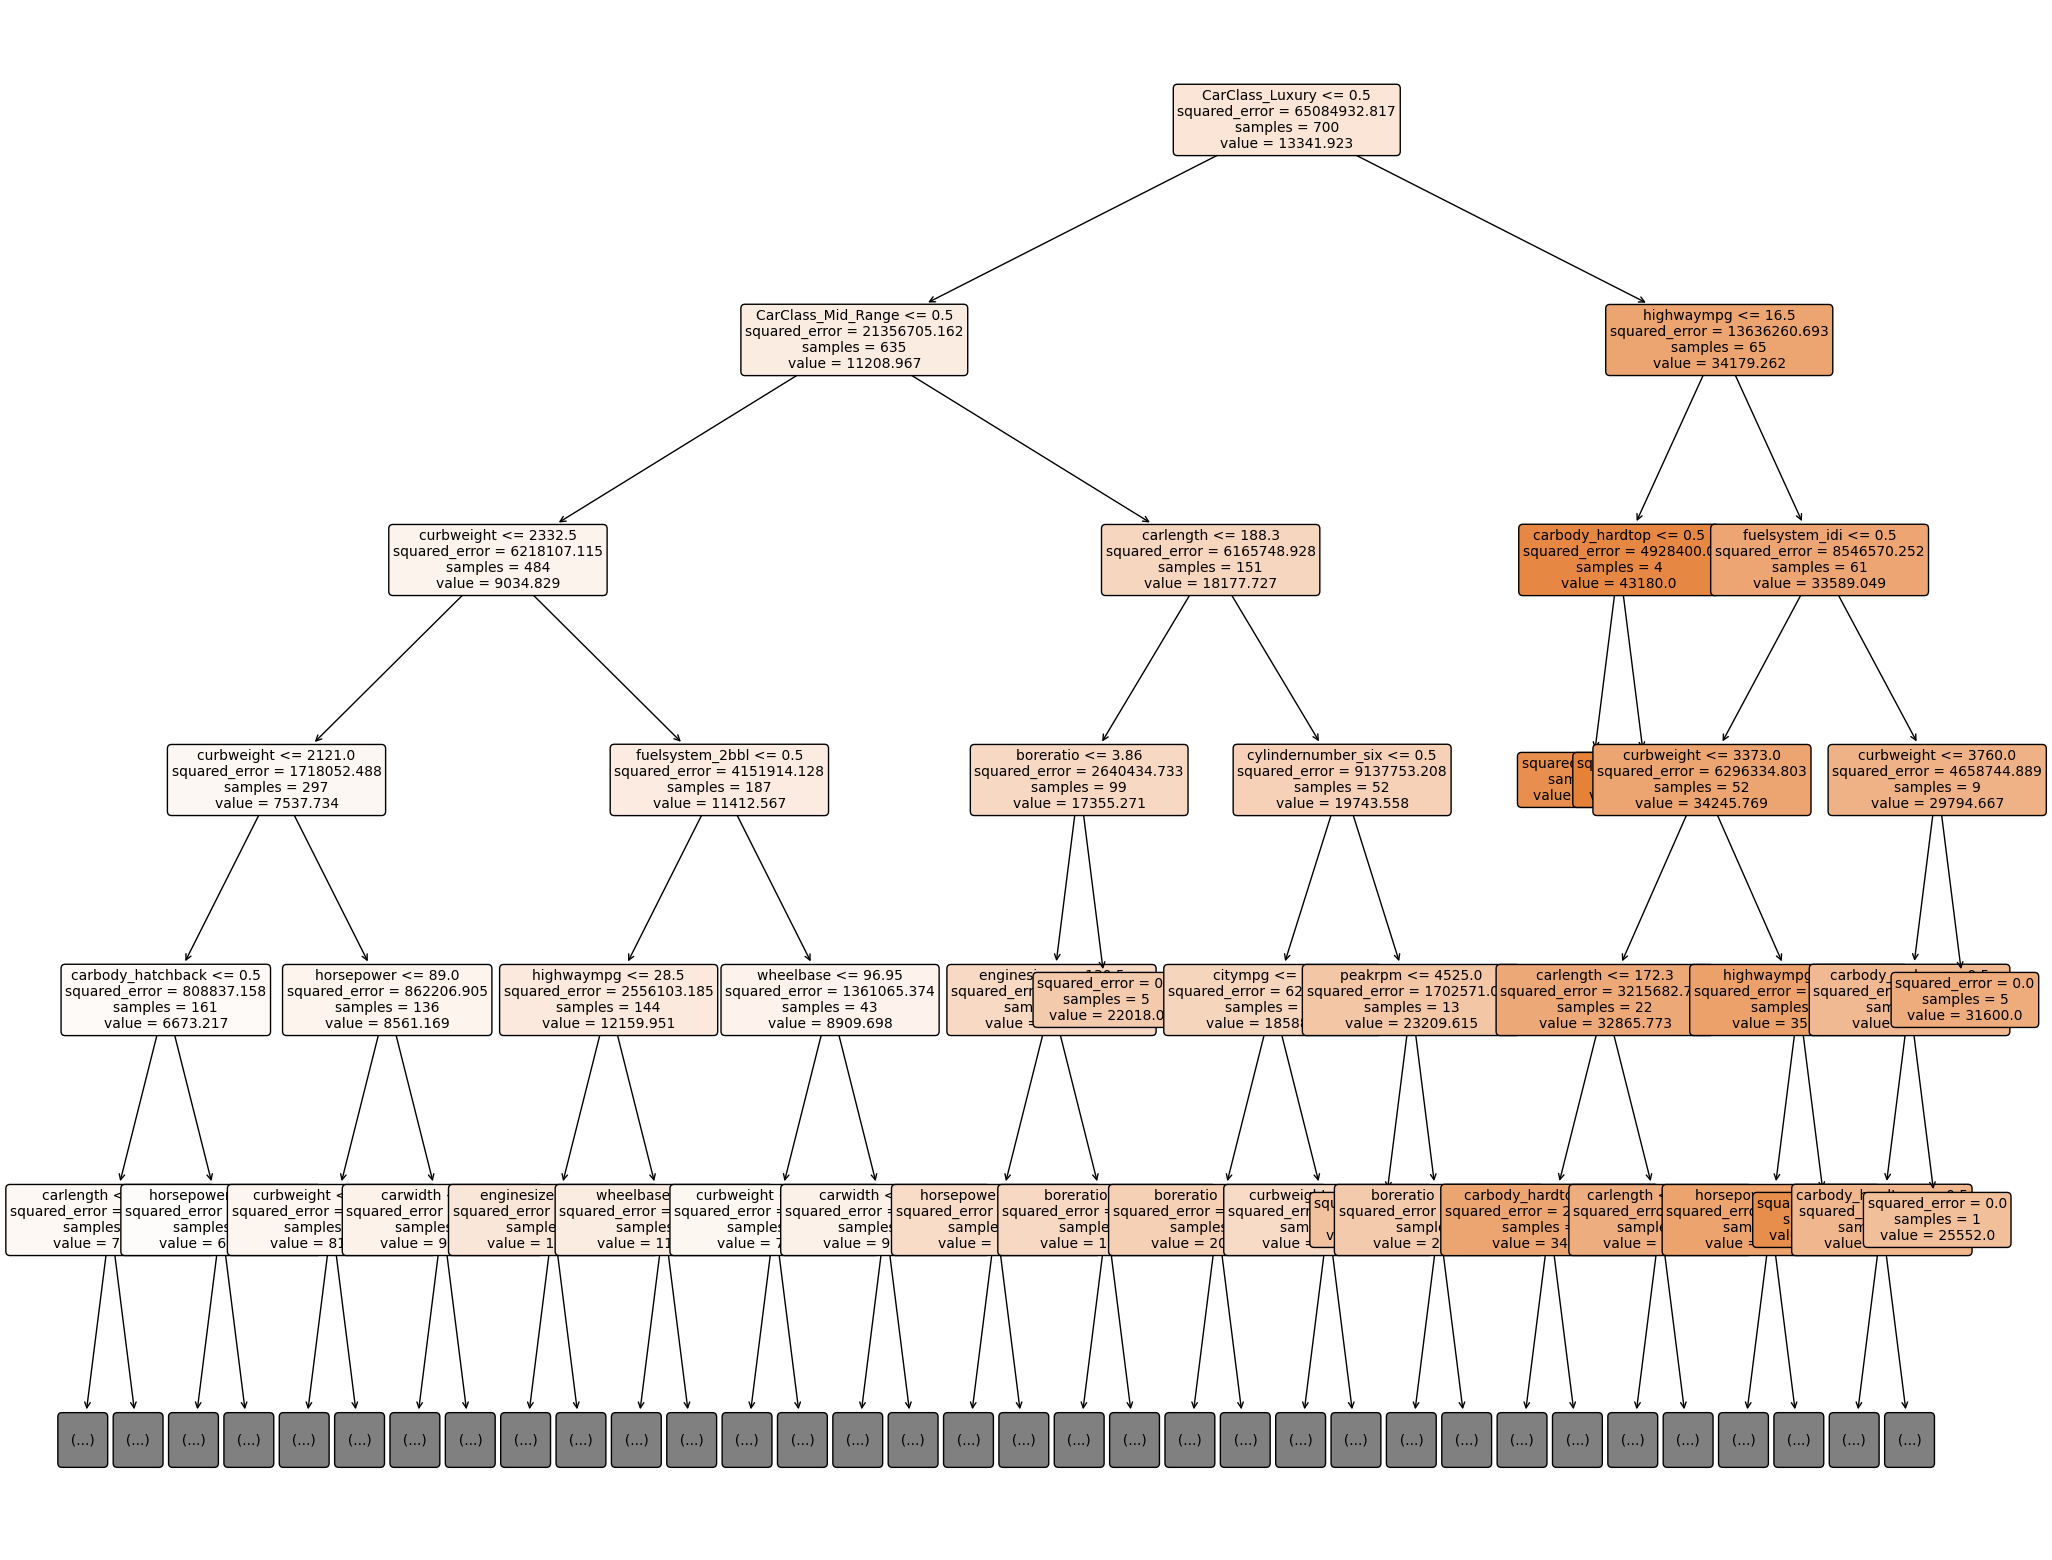

In [223]:
plt.figure(figsize=(25, 20))
plot_tree(best_estimator_rf.estimators_[0], feature_names=valid_X3.columns, filled = True, rounded = True,
          max_depth = 5, fontsize = 10)
plt.show()

In [224]:
rf_summary = r2_score(valid_y3, best_estimator_rf.predict(valid_X3))
rf_summary

0.9991707282835413

In [225]:
regressionSummary(valid_y3, best_estimator_rf.predict(valid_X3))


Regression statistics

                      Mean Error (ME) : -10.8815
       Root Mean Squared Error (RMSE) : 235.7489
            Mean Absolute Error (MAE) : 57.9902
          Mean Percentage Error (MPE) : -0.1313
Mean Absolute Percentage Error (MAPE) : 0.5364


In [226]:
rf_regression = pd.DataFrame({'Actual': valid_y3, 'Predicted': best_estimator_rf.predict(valid_X3)})
rf_regression

Actual  Predicted
507   7349.0     7349.0
818  15750.0    15750.0
452   5348.0     5348.0
368   8921.0     8921.0
242   7499.0     7499.0
..       ...        ...
459  14489.0    14489.0
415  17199.0    17199.0
61    5389.0     5389.0
347  30760.0    30760.0
349   7395.0     7395.0

[300 rows x 2 columns]

In [227]:
rf_regression.to_csv('rf_regression.csv', index=False)

### Gradient Boosting

In [228]:
rfe_gb = RFE(estimator=gradient_b, n_features_to_select=30)
rfe_gb.fit(X1,y1)

RFE(estimator=GradientBoostingRegressor(), n_features_to_select=30)

In [229]:
features_30_G = X1.columns[rfe_gb.support_]
features_30_G

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'CarClass_Luxury',
       'CarClass_Mid_Range'],
      dtype='object')

In [230]:
train_X4, valid_X4, train_y4, valid_y4 = train_test_split(X1[features_30_G],y1, test_size = 0.3,random_state = 1)

In [231]:
param_grid_gb = {
    'loss': ['huber'],
    'max_depth': [5],
    'min_samples_leaf': [2],
    'min_samples_split': [6],
    'n_estimators': [75],
} #Optimal hyperparameter

gridsearch_gb = GridSearchCV(GradientBoostingRegressor(random_state = 1), param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gridsearch_gb.fit(train_X4, train_y4)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
             n_jobs=-1,
             param_grid={'loss': ['huber'], 'max_depth': [5],
                         'min_samples_leaf': [2], 'min_samples_split': [6],
                         'n_estimators': [75]},
             scoring='neg_mean_squared_error')

In [232]:
best_params_gb = gridsearch_gb.best_params_
best_estimator_gb = gridsearch_gb.best_estimator_

print(best_params_gb)
print(best_estimator_gb)

{'loss': 'huber', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 75}
GradientBoostingRegressor(loss='huber', max_depth=5, min_samples_leaf=2,
                          min_samples_split=6, n_estimators=75, random_state=1)


In [233]:
gb_summary = r2_score(valid_y4, best_estimator_gb.predict(valid_X4))
gb_summary

0.996295571127603

In [234]:
regressionSummary(valid_y4, best_estimator_gb.predict(valid_X4))


Regression statistics

                      Mean Error (ME) : 36.3114
       Root Mean Squared Error (RMSE) : 498.2667
            Mean Absolute Error (MAE) : 232.6177
          Mean Percentage Error (MPE) : -0.2370
Mean Absolute Percentage Error (MAPE) : 1.9435


In [235]:
gb_regression = pd.DataFrame({'Actual': valid_y4, 'Predicted': best_estimator_gb.predict(valid_X4)})
gb_regression

Actual     Predicted
507   7349.0   7508.345502
818  15750.0  15808.636269
452   5348.0   5618.076398
368   8921.0   8949.190553
242   7499.0   7419.806429
..       ...           ...
459  14489.0  14425.023715
415  17199.0  17425.726530
61    5389.0   5577.306098
347  30760.0  30845.220954
349   7395.0   7189.786755

[300 rows x 2 columns]

In [236]:
gb_regression.to_csv('gb_regression.csv', index=False)

### **15** Selected Variables

*   Linear Regression




In [237]:
rfe_linear2 = RFE(estimator=linear_m, n_features_to_select=15)
rfe_linear2.fit(X1,y1)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [238]:
features_15_L = X1.columns[rfe_linear2.support_]
features_15_L

Index(['boreratio', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'CarClass_Luxury', 'CarClass_Mid_Range'],
      dtype='object')

In [239]:
train_X5, valid_X5, train_y5, valid_y5 = train_test_split(X1[features_15_L],y1, test_size=0.3,random_state=1)

In [240]:
useful_num2 = list(train_X5.select_dtypes(include=['int64', 'float64']))
scaler = StandardScaler()
train_X5[useful_num2] = scaler.fit_transform(train_X5[useful_num2])
valid_X5[useful_num2] = scaler.fit_transform(valid_X5[useful_num2])

In [241]:
train_y5_np = np.array(train_y5).reshape(-1, 1)
train_y5_minmax = scaler.fit_transform(train_y5_np)
train_y5_scaled = pd.Series(train_y5_minmax.flatten())

In [242]:
valid_y5_np = np.array(valid_y5).reshape(-1, 1)
valid_y5_minmax = scaler.fit_transform(valid_y5_np)
valid_y5_scaled = pd.Series(valid_y5_minmax.flatten())

In [243]:
linear_m.fit(train_X5,train_y5_scaled)

LinearRegression()

In [244]:
linear_summary2 = r2_score(valid_y5_scaled, linear_m.predict(valid_X5))
linear_summary2

0.9385637457239466

In [245]:
list_train_y5_scaled = list(train_y5_scaled)
X_train_ols3 = sm.add_constant(train_X5)
lm_ols3 = sm.OLS(list_train_y5_scaled,X_train_ols3).fit()
print(lm_ols3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1005.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:21:54   Log-Likelihood:                 81.265
No. Observations:                 700   AIC:                            -132.5
Df Residuals:                     685   BIC:                            -64.26
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6162 

Backward Elimination

In [246]:
def backward_elimination_2(data, target, significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features) > 0):
        features_with_constant = sm.add_constant(data[features])
        p_values_fit_2 = sm.OLS(list(target), features_with_constant).fit().pvalues[1:]
        max_p_value = p_values_fit_2.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values_fit_2.idxmax()
            features.remove(excluded_feature)
        else:
            break

    return features

selected_features = backward_elimination_2(X_train_ols3, train_y5_scaled, significance_level = 0.05)
print(selected_features)

['const', 'boreratio', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'CarClass_Luxury', 'CarClass_Mid_Range']


In [247]:
X_train_ols_back2 = sm.add_constant(X_train_ols3[selected_features])
lm_ols_back2 = sm.OLS(list_train_y5_scaled,X_train_ols_back2).fit()
print(lm_ols_back2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1082.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:21:54   Log-Likelihood:                 80.647
No. Observations:                 700   AIC:                            -133.3
Df Residuals:                     686   BIC:                            -69.58
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5906 

In [248]:
p_values2 = lm_ols_back2.pvalues
high_p_var2 = p_values2[p_values2 > 0.05]
print(high_p_var2)

Series([], dtype: float64)


In [249]:
r_ols2 = lm_ols_back2.rsquared
r_ols2

0.9534997376523686

In [301]:
lm_equation2 = f'Linear Equation = {0.5906:.2f} + '
for i, (col_name2, coef2) in enumerate(lm_ols_back2.params.drop('const').items()):
    if i > 0:
        lm_equation2 += ' + '
    lm_equation2 += f'{coef2:.2f} * {col_name2}'
print(lm_equation2)

Linear Equation = 0.59 + 0.21 * boreratio + -0.96 * enginetype_dohcv + 0.31 * enginetype_l + 0.34 * enginetype_ohc + -0.48 * enginetype_rotor + -0.94 * cylindernumber_five + -1.25 * cylindernumber_four + -0.53 * cylindernumber_six + -1.33 * cylindernumber_three + -0.48 * cylindernumber_two + -0.27 * fuelsystem_2bbl + 0.28 * fuelsystem_4bbl + 2.13 * CarClass_Luxury + 0.66 * CarClass_Mid_Range


Regression Summary

In [251]:
y_train_pred2 = lm_ols_back2.predict(X_train_ols_back2)

me2 = (list_train_y5_scaled - y_train_pred2).mean()
mae2 = mean_absolute_error(list_train_y5_scaled, y_train_pred2)
rmse2 = mean_squared_error(list_train_y5_scaled, y_train_pred2, squared=False)
mpe2 = ((list_train_y5_scaled - y_train_pred2) / list_train_y5_scaled).mean()
mape2 = (abs(list_train_y5_scaled - y_train_pred2) / list_train_y5_scaled).mean()

print('Regression Summary - Scaled\n')
print(f"Mean Error (ME): {me2:.3f}")
print(f'Root Mean Squared Error (RMSE): {rmse2:.3f}')
print(f'Mean Absolute Error (MAE): {mae2:.3f}')
print(f'Mean Percentage Error (MPE): {mpe2:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape2:.3f}')
print('_'*50)
print('Regression Summary - Unscaled\n')

y_train_pred_original2 = scaler.inverse_transform(y_train_pred2.to_numpy().reshape(-1, 1))
y_train_pred_original2

me_uc2 = (list(train_y5) - y_train_pred_original2).mean()
mae_uc2 = mean_absolute_error(list(train_y5), y_train_pred_original2)
rmse_uc2 = mean_squared_error(list(train_y5), y_train_pred_original2, squared=False)
mpe_uc2 = ((list(train_y5) - y_train_pred_original2) / list(train_y5)).mean()
mape_uc2 = (abs(list(train_y5) - y_train_pred_original2) / list(train_y5)).mean()


print(f"Mean Error (ME): {me_uc2:.3f}")
print(f'Root Mean Squared Error (RMSE): {rmse_uc2:.3f}')
print(f'Mean Absolute Error (MAE): {mae_uc2:.3f}')
print(f'Mean Percentage Error (MPE): {mpe_uc2:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_uc2:.3f}')

Regression Summary - Scaled

Mean Error (ME): -0.000
Root Mean Squared Error (RMSE): 0.216
Mean Absolute Error (MAE): 0.156
Mean Percentage Error (MPE): 0.076
Mean Absolute Percentage Error (MAPE): 0.147
__________________________________________________
Regression Summary - Unscaled

Mean Error (ME): -355.952
Root Mean Squared Error (RMSE): 1779.516
Mean Absolute Error (MAE): 1340.812
Mean Percentage Error (MPE): -0.330
Mean Absolute Percentage Error (MAPE): 0.682


In [252]:
X_ols2 = sm.add_constant(valid_X5)
X_ols_new2 = X_ols2[X_train_ols_back2.columns]
y_predict2 = lm_ols_back2.predict(X_ols_new2)

In [253]:
unscaled_y_predict2 = scaler.inverse_transform(y_predict2.values.reshape(-1,1))

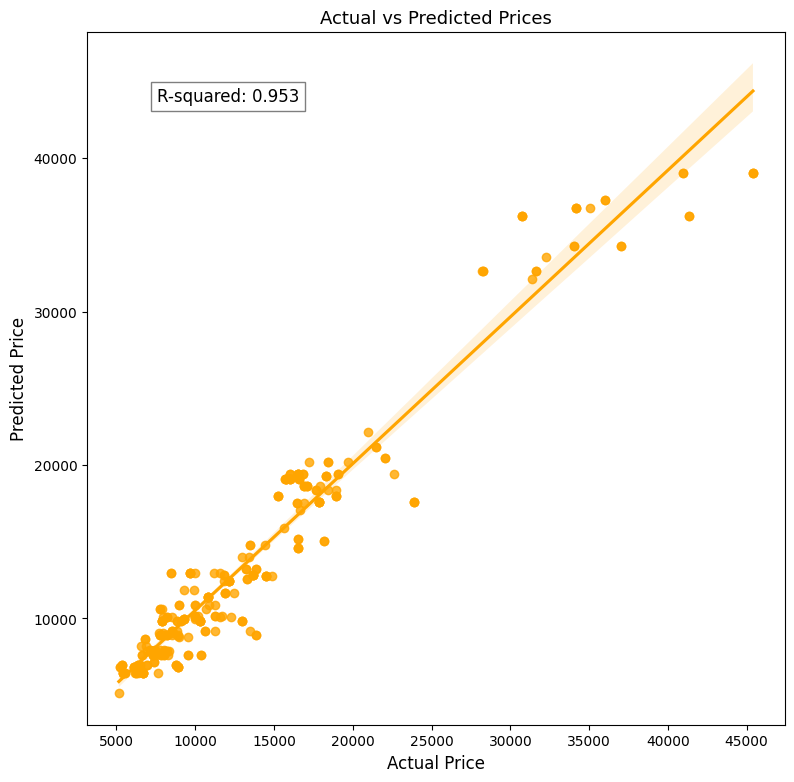

In [254]:
plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots(figsize=(9,9))
sns.regplot(x = valid_y5,y = unscaled_y_predict2, color='orange', ax = ax)
plt.title('Actual vs Predicted Prices', fontsize=13)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.text(0.1, 0.9, f"R-squared: {r_ols2:.3f}", transform = ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [255]:
lm_regression2 = pd.DataFrame({'Actual': valid_y5, 'Predicted': unscaled_y_predict2.flatten()})
lm_regression2

Actual     Predicted
507   7349.0   7610.276167
818  15750.0  19101.148007
452   5348.0   6945.671716
368   8921.0   8873.024623
242   7499.0   7610.276167
..       ...           ...
459  14489.0  12742.021759
415  17199.0  20164.515129
61    5389.0   6413.988155
347  30760.0  36230.417987
349   7395.0   7145.053051

[300 rows x 2 columns]

In [256]:
lm_regression2.to_csv('lm_regression2.csv', index=False)

### Decision Tree

In [257]:
rfe_tree2 = RFE(estimator = decision_t, n_features_to_select=15)
rfe_tree2.fit(X1,y1)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=15)

In [258]:
features_15_D = X1.columns[rfe_tree2.support_]
features_15_D

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'peakrpm', 'highwaympg',
       'aspiration_turbo', 'carbody_hatchback', 'fuelsystem_2bbl',
       'CarClass_Luxury', 'CarClass_Mid_Range'],
      dtype='object')

In [259]:
train_X6, valid_X6, train_y6, valid_y6 = train_test_split(X1[features_15_D],y1, test_size = 0.3,random_state = 1)

In [260]:
gridsearch_dt2 = GridSearchCV(DecisionTreeRegressor(random_state = 1),param_grid_dt, cv = 5)
gridsearch_dt2.fit(train_X6,train_y6)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [15], 'min_samples_leaf': [2],
                         'min_samples_split': [5]})

In [261]:
best_params_dt2 = gridsearch_dt2.best_params_
best_estimator_dt2 = gridsearch_dt2.best_estimator_

print(best_params_dt2)
print(best_estimator_dt2)

{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
DecisionTreeRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      random_state=1)


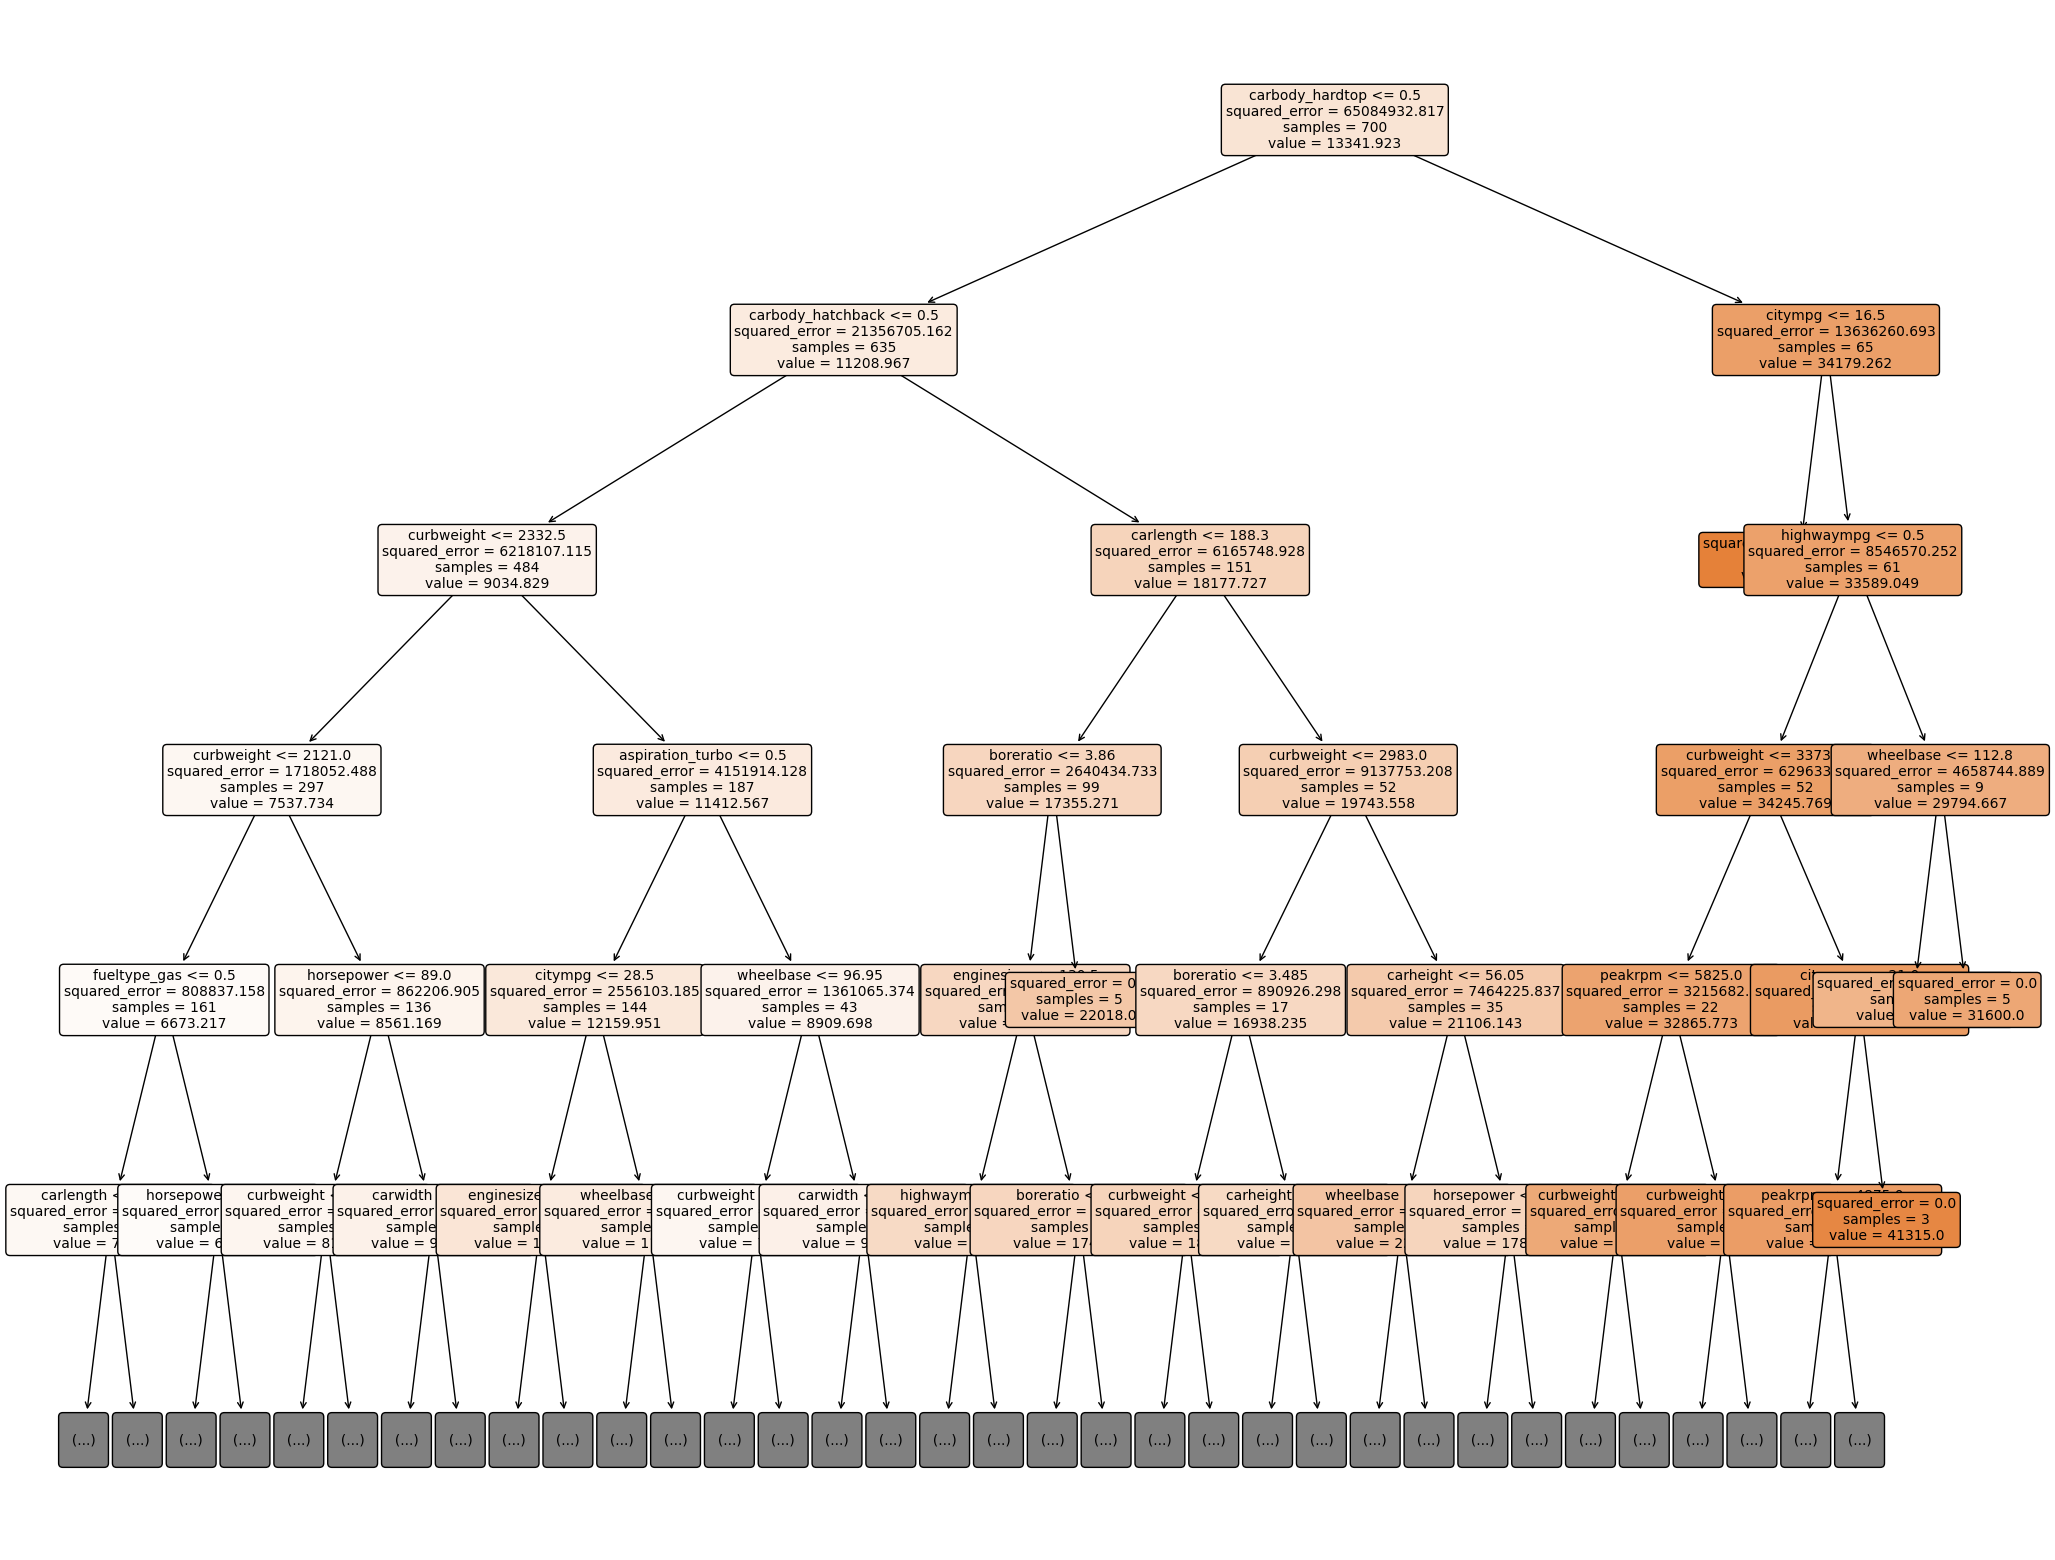

In [262]:
plt.figure(figsize=(25, 20))
plot_tree(best_estimator_dt2, feature_names = valid_X2.columns, filled = True, rounded = True,
          max_depth = 5, fontsize = 10)
plt.show()

In [263]:
dt_summary2 = r2_score(valid_y6, best_estimator_dt2.predict(valid_X6))
dt_summary2

0.9977497073492861

In [264]:
regressionSummary(valid_y6, best_estimator_dt2.predict(valid_X6))


Regression statistics

                      Mean Error (ME) : -3.8452
       Root Mean Squared Error (RMSE) : 388.3477
            Mean Absolute Error (MAE) : 123.8508
          Mean Percentage Error (MPE) : -0.1243
Mean Absolute Percentage Error (MAPE) : 0.8295


In [265]:
dt_regression2 = pd.DataFrame({'Actual': valid_y6, 'Predicted': best_estimator_dt2.predict(valid_X6)})
dt_regression2

Actual     Predicted
507   7349.0   7349.000000
818  15750.0  15750.000000
452   5348.0   5348.000000
368   8921.0   8921.000000
242   7499.0   7470.428571
..       ...           ...
459  14489.0  14489.000000
415  17199.0  17199.000000
61    5389.0   5389.000000
347  30760.0  30760.000000
349   7395.0   7467.625000

[300 rows x 2 columns]

In [266]:
dt_regression2.to_csv('dt_regression2.csv', index=False)

### Random Forest

In [267]:
rfe_rf2 = RFE(estimator = random_f, n_features_to_select=15)
rfe_rf2.fit(X1,y1)

RFE(estimator=RandomForestRegressor(), n_features_to_select=15)

In [268]:
features_15_F = X1.columns[rfe_rf2.support_]
features_15_F

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'aspiration_turbo', 'carbody_hatchback',
       'CarClass_Luxury', 'CarClass_Mid_Range'],
      dtype='object')

In [269]:
train_X7, valid_X7, train_y7, valid_y7 = train_test_split(X1[features_15_F],y1, test_size = 0.3,random_state = 1)

In [270]:
param_grid_rf2 = {
    'n_estimators': [50],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'bootstrap': [False]
}

gridsearch_rf2 = GridSearchCV(RandomForestRegressor(random_state = 1), param_grid_rf2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gridsearch_rf2.fit(train_X7, train_y7)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [None],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [50]},
             scoring='neg_mean_squared_error')

In [271]:
best_params_rf2 = gridsearch_rf2.best_params_
best_estimator_rf2 = gridsearch_rf2.best_estimator_

print(best_params_rf2)
print(best_estimator_rf2)

{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestRegressor(bootstrap=False, min_samples_leaf=2, n_estimators=50,
                      random_state=1)


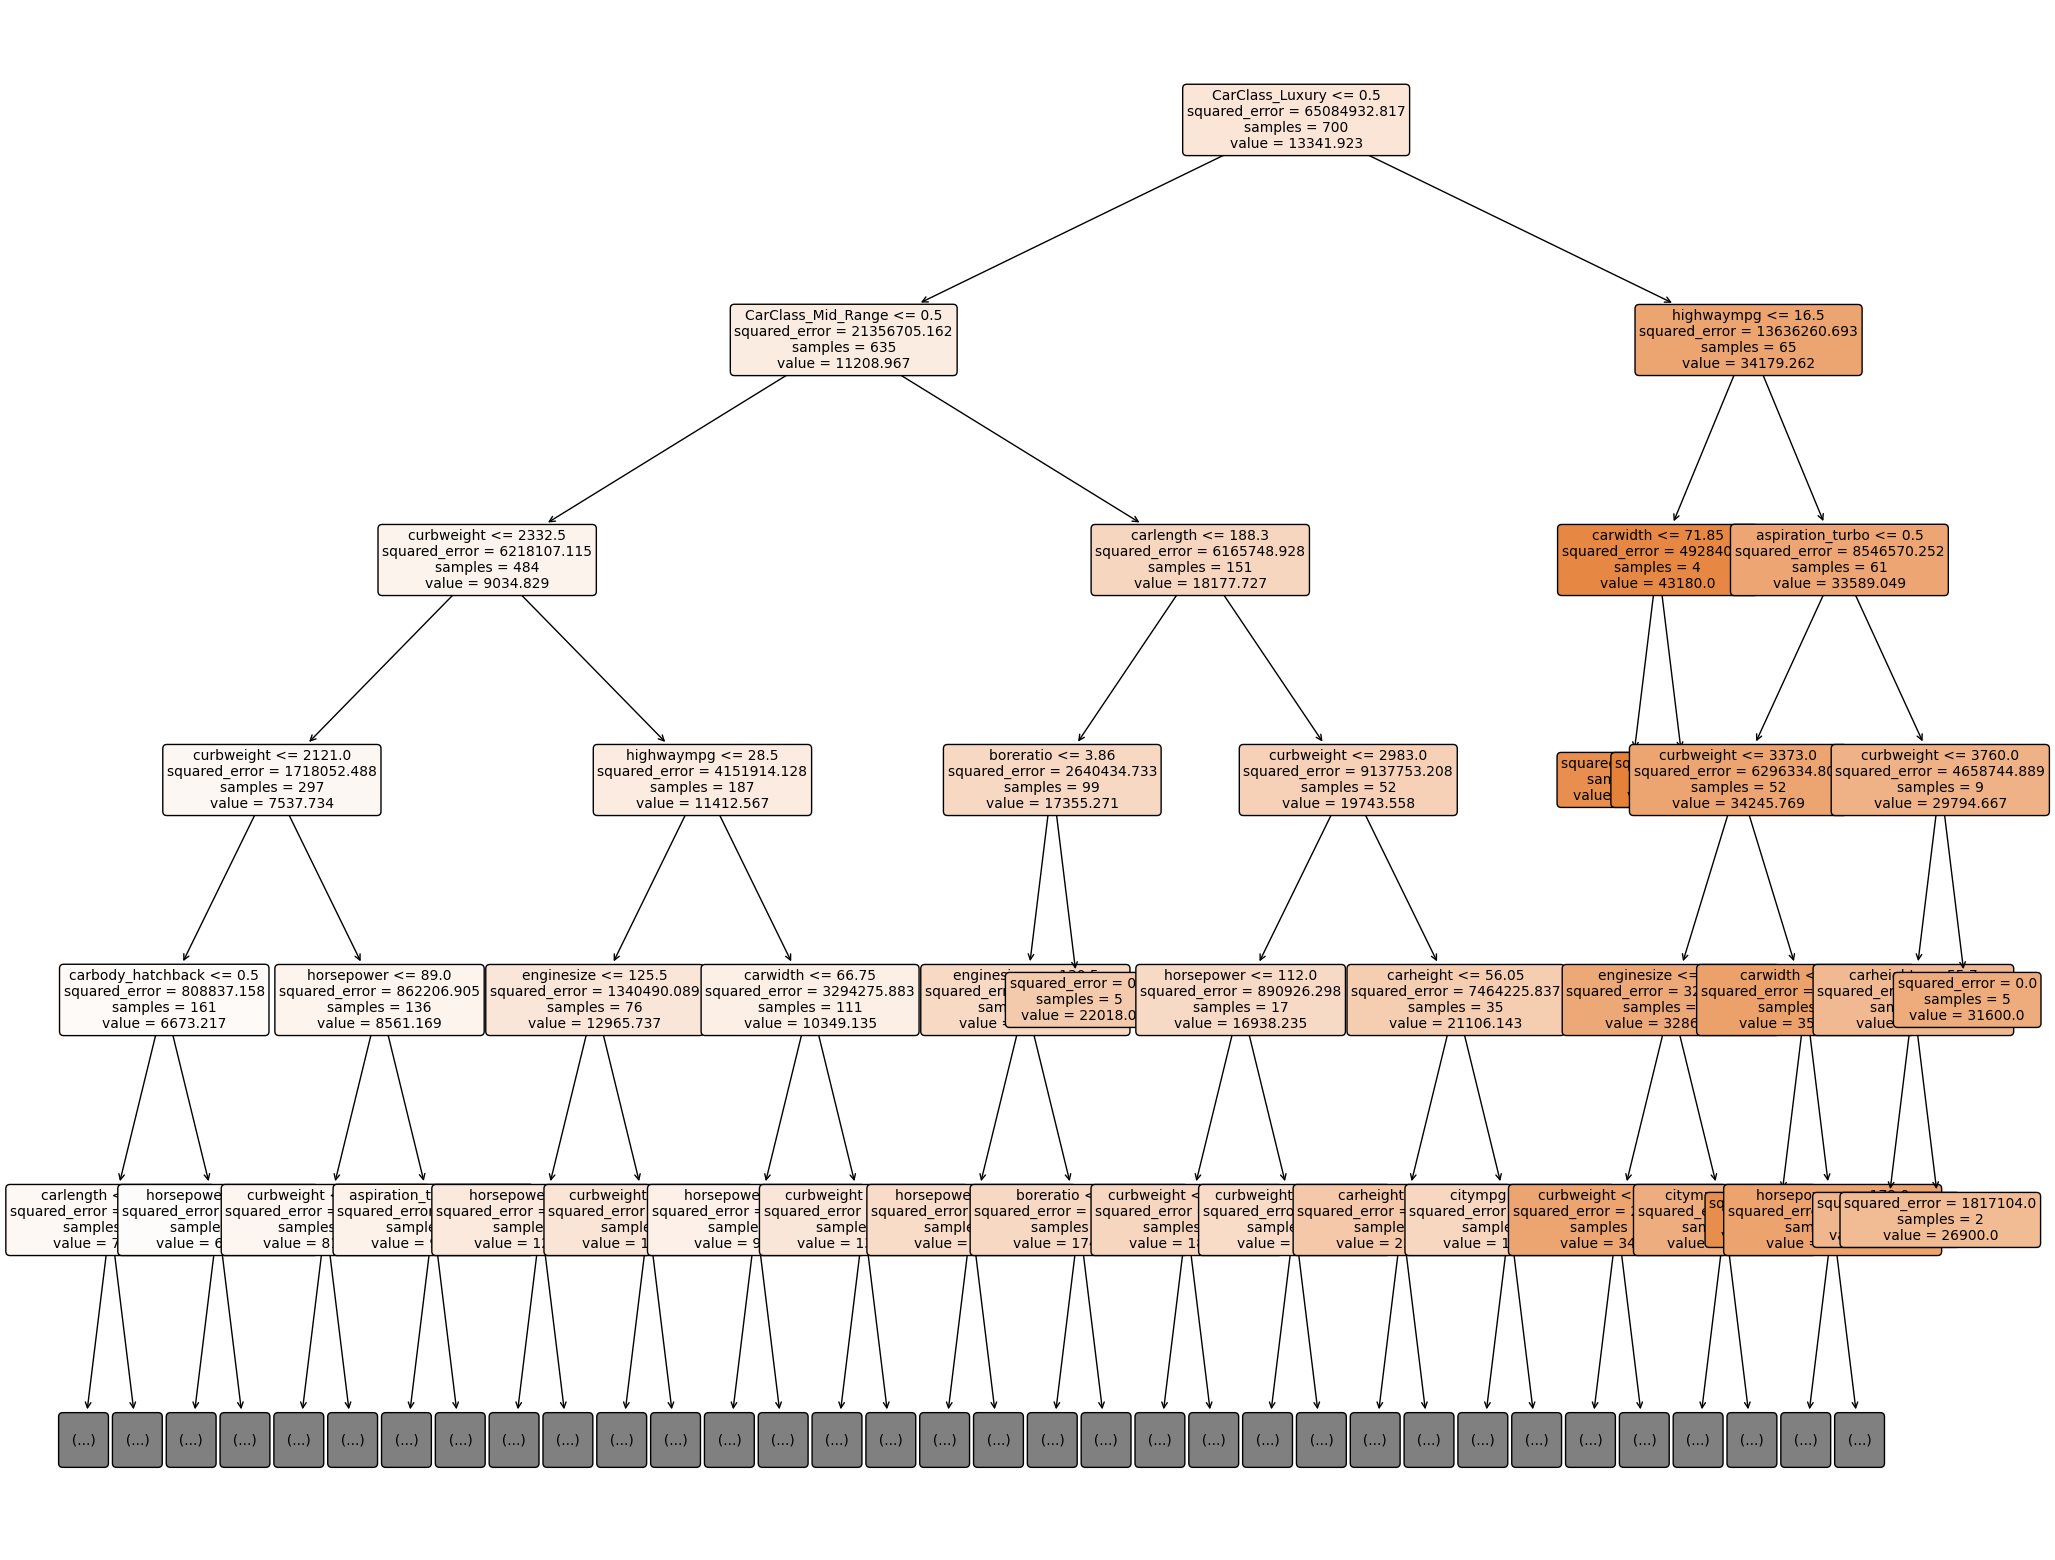

In [272]:
plt.figure(figsize=(25, 20))
plot_tree(best_estimator_rf2.estimators_[0], feature_names = valid_X7.columns, filled = True, rounded = True,
          max_depth = 5, fontsize = 10)
plt.show()

In [273]:
rf_summary2 = r2_score(valid_y7, best_estimator_rf2.predict(valid_X7))
rf_summary2

0.9989031783084937

In [274]:
regressionSummary(valid_y7, best_estimator_rf2.predict(valid_X7))


Regression statistics

                      Mean Error (ME) : -7.4309
       Root Mean Squared Error (RMSE) : 271.1248
            Mean Absolute Error (MAE) : 82.6473
          Mean Percentage Error (MPE) : -0.1036
Mean Absolute Percentage Error (MAPE) : 0.6954


In [275]:
rf_regression2 = pd.DataFrame({'Actual': valid_y7, 'Predicted': best_estimator_rf2.predict(valid_X7)})
rf_regression2

Actual     Predicted
507   7349.0   7349.000000
818  15750.0  15750.000000
452   5348.0   5348.000000
368   8921.0   8921.000000
242   7499.0   7470.428571
..       ...           ...
459  14489.0  14489.000000
415  17199.0  17199.000000
61    5389.0   5389.000000
347  30760.0  30760.000000
349   7395.0   7467.625000

[300 rows x 2 columns]

In [276]:
rf_regression2.to_csv('rf_regression2.csv', index=False)

### Gradient Boosting

In [277]:
rfe_gb2 = RFE(estimator=gradient_b, n_features_to_select=15)
rfe_gb2.fit(X1,y1)

RFE(estimator=GradientBoostingRegressor(), n_features_to_select=15)

In [278]:
features_15_G = X1.columns[rfe_gb2.support_]
features_15_G

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'aspiration_turbo', 'fuelsystem_2bbl', 'CarClass_Luxury',
       'CarClass_Mid_Range'],
      dtype='object')

In [279]:
train_X8, valid_X8, train_y8, valid_y8 = train_test_split(X1[features_15_G],y1, test_size = 0.3,random_state = 1)

In [280]:
gridsearch_gb2 = GridSearchCV(GradientBoostingRegressor(random_state = 1), param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gridsearch_gb2.fit(train_X8, train_y8)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
             n_jobs=-1,
             param_grid={'loss': ['huber'], 'max_depth': [5],
                         'min_samples_leaf': [2], 'min_samples_split': [6],
                         'n_estimators': [75]},
             scoring='neg_mean_squared_error')

In [281]:
best_params_gb2 = gridsearch_gb2.best_params_
best_estimator_gb2 = gridsearch_gb2.best_estimator_

print(best_params_gb2)
print(best_estimator_gb2)

{'loss': 'huber', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 75}
GradientBoostingRegressor(loss='huber', max_depth=5, min_samples_leaf=2,
                          min_samples_split=6, n_estimators=75, random_state=1)


In [282]:
gb_summary2 = r2_score(valid_y8, best_estimator_gb2.predict(valid_X8))
gb_summary2

0.9976473350109816

In [283]:
regressionSummary(valid_y8, best_estimator_gb2.predict(valid_X8))


Regression statistics

                      Mean Error (ME) : 22.4322
       Root Mean Squared Error (RMSE) : 397.0830
            Mean Absolute Error (MAE) : 216.0547
          Mean Percentage Error (MPE) : -0.1383
Mean Absolute Percentage Error (MAPE) : 1.9999


In [284]:
gb_regression2 = pd.DataFrame({'Actual': valid_y8, 'Predicted': best_estimator_gb2.predict(valid_X8)})
gb_regression2

Actual     Predicted
507   7349.0   7524.902436
818  15750.0  15867.123007
452   5348.0   5483.381130
368   8921.0   8972.885291
242   7499.0   7446.428310
..       ...           ...
459  14489.0  14366.780109
415  17199.0  17433.985138
61    5389.0   5563.427368
347  30760.0  30807.785116
349   7395.0   6794.167421

[300 rows x 2 columns]

In [285]:
gb_regression2.to_csv('gb_regression2.csv', index=False)

### Model Summary (Correct to 3 significant figures)

In [286]:
bold = "\033[1m"
reset = "\033[0m"

In [287]:
print('Models Regression Summary')
print('-'*50)
print('30 Selected Features:\n')
print(f'{bold}Linear Regression{reset} R^2: {r_ols:.3f}', )
print(f'                      Mean Error (ME): {me_uc:.3f}'  )
print(f'       Root Mean Squared Error (RMSE): {rmse_uc:.3f}')
print(f'            Mean Absolute Error (MAE): {mae_uc:.3f}')
print(f'          Mean Percentage Error (MPE): {mpe_uc:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_uc:.3f}')
print('_'*50)
print(f'{bold}Decision Tree{reset} R^2: {dt_summary:.3f}')
regressionSummary(valid_y2,best_estimator_dt.predict(valid_X2))
print('_'*50)
print(f'{bold}Random Forest{reset} R^2: {rf_summary:.3f}')
regressionSummary(valid_y3,best_estimator_rf.predict(valid_X3))
print('_'*50)
print(f'{bold}Gradient Boosting{reset} R^2: {gb_summary:.3f}')
regressionSummary(valid_y4,best_estimator_gb.predict(valid_X4))

print('-'*50)
print('15 Selected Features:\n')
print(f'{bold}Linear Regression{reset} R^2: {r_ols2:.3f}')
print(f'                      Mean Error (ME): {me_uc2:.3f}'  )
print(f'       Root Mean Squared Error (RMSE): {rmse_uc2:.3f}')
print(f'            Mean Absolute Error (MAE): {mae_uc2:.3f}')
print(f'          Mean Percentage Error (MPE): {mpe_uc2:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_uc2:.3f}')
print('_'*50)
print(f'{bold}Decision Tree{reset} R^2: {dt_summary2:.3f}')
regressionSummary(valid_y6, best_estimator_dt2.predict(valid_X6))
print('_'*50)
print(f'{bold}Random Forest{reset} R^2: {rf_summary2:.3f}')
regressionSummary(valid_y7, best_estimator_rf2.predict(valid_X7))
print('_'*50)
print(f'{bold}Gradient Boosting{reset} R^2: {gb_summary2:.3f}')
regressionSummary(valid_y8, best_estimator_gb2.predict(valid_X8))
print('_'*50)

Models Regression Summary
--------------------------------------------------
30 Selected Features:

Linear Regression R^2: 0.966
                      Mean Error (ME): -355.952
       Root Mean Squared Error (RMSE): 1535.472
            Mean Absolute Error (MAE): 1125.645
          Mean Percentage Error (MPE): -0.330
Mean Absolute Percentage Error (MAPE): 0.692
__________________________________________________
Decision Tree R^2: 0.998

Regression statistics

                      Mean Error (ME) : -2.1364
       Root Mean Squared Error (RMSE) : 388.8609
            Mean Absolute Error (MAE) : 123.8295
          Mean Percentage Error (MPE) : -0.1010
Mean Absolute Percentage Error (MAPE) : 0.8291
__________________________________________________
Random Forest R^2: 0.999

Regression statistics

                      Mean Error (ME) : -10.8815
       Root Mean Squared Error (RMSE) : 235.7489
            Mean Absolute Error (MAE) : 57.9902
          Mean Percentage Error (MPE) : -0.1313
M

### Focus on RMSE and MAE

In [288]:
model_list = ['30 Features','Linear Regression', 'Decision Tree','Random Forest','Gradient Boosting',
              '15 Features','Linear Regression', 'Decision Tree','Random Forest','Gradient Boosting']

mae_dt = mean_absolute_error(valid_y2, best_estimator_dt.predict(valid_X2))
mae_rf = mean_absolute_error(valid_y3, best_estimator_rf.predict(valid_X3))
mae_gb = mean_absolute_error(valid_y4, best_estimator_gb.predict(valid_X4))


mae_dt2 = mean_absolute_error(valid_y6, best_estimator_dt2.predict(valid_X6))
mae_rf2 = mean_absolute_error(valid_y7, best_estimator_rf2.predict(valid_X7))
mae_gb2 = mean_absolute_error(valid_y8, best_estimator_gb2.predict(valid_X8))

rmse_dt = mean_squared_error(valid_y2, best_estimator_dt.predict(valid_X2), squared=False)
rmse_rf = mean_squared_error(valid_y3, best_estimator_rf.predict(valid_X3), squared=False)
rmse_gb = mean_squared_error(valid_y4, best_estimator_gb.predict(valid_X4), squared=False)

rmse_dt2 = mean_squared_error(valid_y6, best_estimator_dt2.predict(valid_X6), squared=False)
rmse_rf2 = mean_squared_error(valid_y7, best_estimator_rf2.predict(valid_X7), squared=False)
rmse_gb2 = mean_squared_error(valid_y8, best_estimator_gb2.predict(valid_X8), squared=False)

rmse_list = ['-',rmse_uc,rmse_dt,rmse_rf,rmse_gb,
             '-',rmse_uc2,rmse_dt2,rmse_rf2,rmse_gb2]

mae_list = ['-',mae_uc,mae_dt,mae_rf,mae_gb,
            '-',mae_uc2,mae_dt2,mae_rf2,mae_gb2]

In [289]:
reg_df = pd.DataFrame({'Model': model_list,'RMSE': rmse_list,'MAE':mae_list})
reg_df['RMSE'] = reg_df['RMSE'].apply(lambda x: '{:.2f}'.format(float(x)) if x != '-' else '-')
reg_df['MAE'] = reg_df['MAE'].apply(lambda x: '{:.2f}'.format(float(x)) if x != '-' else '-')
reg_df

Model     RMSE      MAE
0        30 Features        -        -
1  Linear Regression  1535.47  1125.65
2      Decision Tree   388.86   123.83
3      Random Forest   235.75    57.99
4  Gradient Boosting   498.27   232.62
5        15 Features        -        -
6  Linear Regression  1779.52  1340.81
7      Decision Tree   388.35   123.85
8      Random Forest   271.12    82.65
9  Gradient Boosting   397.08   216.05

### Best Model: Random Forest with 30 Features

Random forest model obtained the lowest errors with an RMSE of 235.75 and an MAE of 57.99.


1.   Root Mean Squared Error : 235.75 (Penalizes larger errors).
The squared differences between the predicted and actual car prices from the random forest model have an average error of 235.75 dollars.
2.   Mean Absolute Error : 57.99 (Less sensitive to outliers).
The predicted car prices from the random forest model are off by 57.99 dollars compared to the actual car prices on average.


Both of these details confirm the model's capability to predict car prices with closest distance between actual and predicted prices, showcasing an efficient car prediction process with high accuracy.

### Variables Importance

In [290]:
features_30_F

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'CarClass_Luxury', 'CarClass_Mid_Range'],
      dtype='object')

In [291]:
rf_plot = RandomForestRegressor(bootstrap = False, max_depth = 15, min_samples_leaf = 1,
                               min_samples_split = 2, n_estimators = 100, random_state = 1)
rf_plot.fit(train_X3,train_y3)
var_imp = rf_plot.feature_importances_
pd.DataFrame({'Features':features_30_F,'Importance':var_imp.round(4)}).sort_values(by='Importance', ascending=False)

Features  Importance
28      CarClass_Luxury      0.6836
29   CarClass_Mid_Range      0.2114
4            curbweight      0.0488
10           highwaympg      0.0124
25      fuelsystem_2bbl      0.0077
1             carlength      0.0063
6             boreratio      0.0050
24   cylindernumber_six      0.0046
0             wheelbase      0.0035
9               citympg      0.0033
7            horsepower      0.0025
5            enginesize      0.0023
2              carwidth      0.0021
14    carbody_hatchback      0.0013
8               peakrpm      0.0011
3             carheight      0.0010
12     aspiration_turbo      0.0008
27      fuelsystem_mpfi      0.0004
15        carbody_sedan      0.0004
22  cylindernumber_five      0.0003
26       fuelsystem_idi      0.0003
13      carbody_hardtop      0.0003
11         fueltype_gas      0.0003
18  enginelocation_rear      0.0001
20       enginetype_ohc      0.0001
21      enginetype_ohcf      0.0001
16        carbody_wagon      0.0001
23  cylindernumber_four      0.0000
17       drivewheel_fwd      0.0000
19         enginetype_l      0.0000

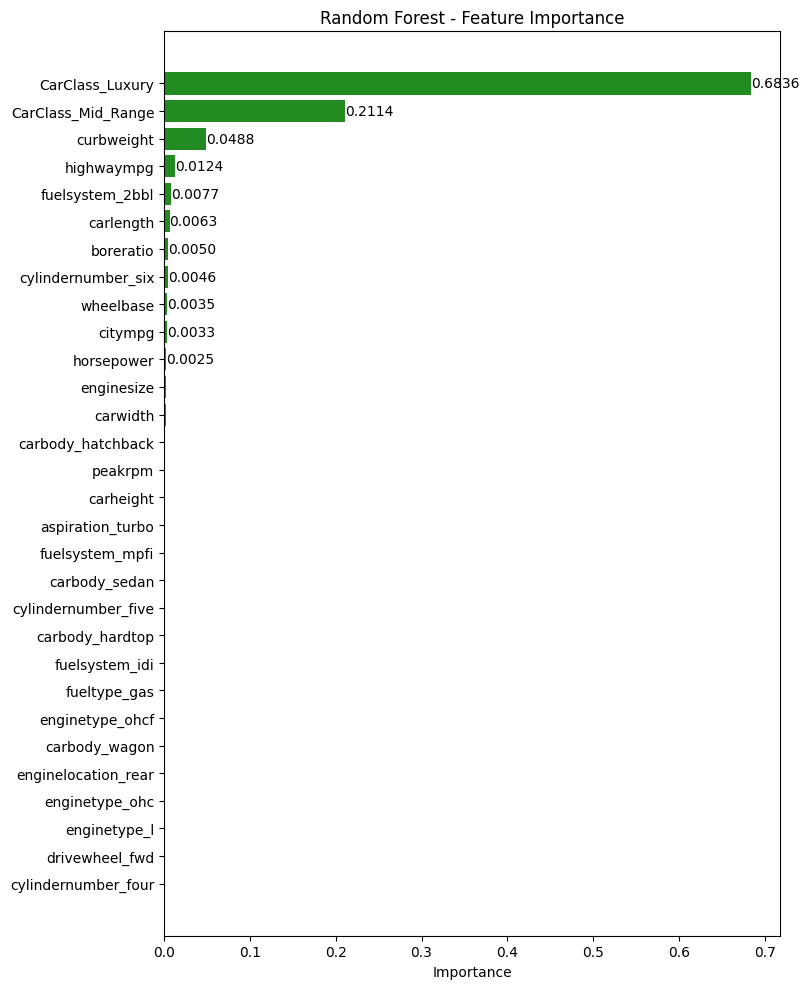

In [292]:
indices = var_imp.argsort()[::1]

plt.figure(figsize=(8, 10))
plt.title('Random Forest - Feature Importance')
bars = plt.barh(range(train_X3.shape[1]), var_imp[indices], align='center',color = 'forestgreen')
plt.yticks(range(train_X3.shape[1]), features_30_F[indices])
plt.xlabel('Importance')
plt.tight_layout()

for bar, importance in zip(bars[-11:], var_imp[indices][-11:]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{importance:.4f}",
             va='center', ha='left')
plt.show()

### Random Forest Actual vs Prediction Graph

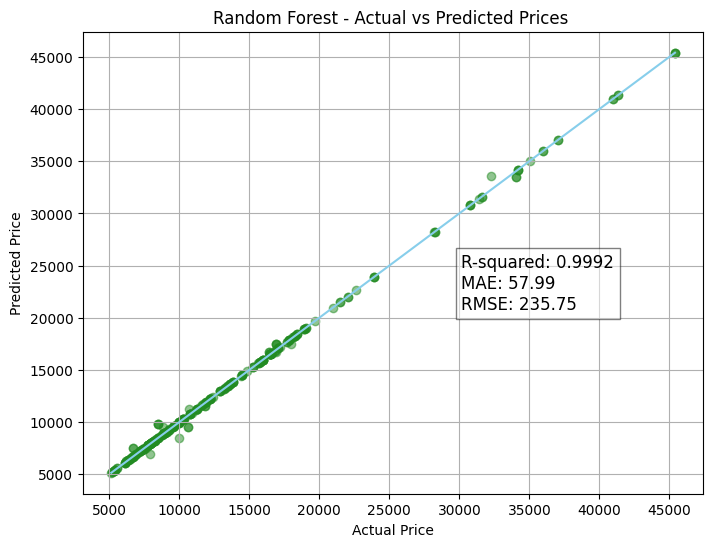

In [293]:
train_y3_pred = best_estimator_rf.predict(train_X3)
valid_y3_pred = best_estimator_rf.predict(valid_X3)

plt.figure(figsize=(8, 6))
plt.scatter(valid_y3, valid_y3_pred, color='forestgreen', alpha=0.5)
plt.title('Random Forest - Actual vs Predicted Prices ')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

plt.plot([min(valid_y3), max(valid_y3)], [min(valid_y3), max(valid_y3)], color='skyblue', linewidth=1.5)
plt.text(0.5, 0.2, f'R-squared: {rf_summary:.4f}\nMAE: {mae_rf:.2f}\nRMSE: {rmse_rf:.2f}', transform = ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

###Overfitting Check

In [294]:
regressionSummary(train_y3, best_estimator_rf.predict(train_X3))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 257.2788
            Mean Absolute Error (MAE) : 63.5961
          Mean Percentage Error (MPE) : -0.0247
Mean Absolute Percentage Error (MAPE) : 0.3838


In [295]:
regressionSummary(valid_y3, best_estimator_rf.predict(valid_X3))


Regression statistics

                      Mean Error (ME) : -10.8815
       Root Mean Squared Error (RMSE) : 235.7489
            Mean Absolute Error (MAE) : 57.9902
          Mean Percentage Error (MPE) : -0.1313
Mean Absolute Percentage Error (MAPE) : 0.5364


Both the RMSE and MAE values in the validation regression summary are slightly lower than those in the training summary. This represents there are no strong indications of overfitting, as the difference between them is not significant.

In [296]:
valid_X3.describe()

wheelbase   carlength    carwidth   carheight   curbweight  \
count  300.000000  300.000000  300.000000  300.000000   300.000000   
mean    99.217000  175.525333   66.089000   53.749667  2600.390000   
std      5.998635   11.721339    2.190244    2.432424   510.282555   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     95.300000  168.800000   64.400000   52.000000  2249.500000   
50%     97.300000  175.000000   65.600000   54.100000  2462.500000   
75%    102.750000  183.775000   67.200000   55.500000  3016.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

       enginesize   boreratio  horsepower      peakrpm     citympg  \
count  300.000000  300.000000  300.000000   300.000000  300.000000   
mean   129.720000    3.343533  106.733333  5134.666667   24.750000   
std     43.796981    0.262172   40.084220   468.415341    6.252291   
min     61.000000    2.680000   48.000000  4150.000000   13.000000   
25%     98.000000    3.150000   70.000000  4800.000000   19.000000   
50%    121.000000    3.310000   97.000000  5200.000000   24.000000   
75%    146.000000    3.590000  121.500000  5500.000000   29.250000   
max    326.000000    3.940000  288.000000  6600.000000   47.000000   

       highwaympg  fueltype_gas  aspiration_turbo  carbody_hardtop  \
count  300.000000    300.000000        300.000000       300.000000   
mean    30.283333      0.893333          0.166667         0.046667   
std      6.716653      0.309205          0.373301         0.211276   
min     16.000000      0.000000          0.000000         0.000000   
25%     25.000000      1.000000          0.000000         0.000000   
50%     30.000000      1.000000          0.000000         0.000000   
75%     34.000000      1.000000          0.000000         0.000000   
max     53.000000      1.000000          1.000000         1.000000   

       carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  \
count         300.000000     300.000000     300.000000      300.000000   
mean            0.343333       0.443333       0.133333        0.560000   
std             0.475615       0.497609       0.340503        0.497216   
min             0.000000       0.000000       0.000000        0.000000   
25%             0.000000       0.000000       0.000000        0.000000   
50%             0.000000       0.000000       0.000000        1.000000   
75%             1.000000       1.000000       0.000000        1.000000   
max             1.000000       1.000000       1.000000        1.000000   

       enginelocation_rear  enginetype_l  enginetype_ohc  enginetype_ohcf  \
count           300.000000    300.000000      300.000000       300.000000   
mean              0.013333      0.056667        0.713333         0.053333   
std               0.114889      0.231591        0.452960         0.225073   
min               0.000000      0.000000        0.000000         0.000000   
25%               0.000000      0.000000        0.000000         0.000000   
50%               0.000000      0.000000        1.000000         0.000000   
75%               0.000000      0.000000        1.000000         0.000000   
max               1.000000      1.000000        1.000000         1.000000   

       cylindernumber_five  cylindernumber_four  cylindernumber_six  \
count           300.000000           300.000000          300.000000   
mean              0.070000             0.743333            0.116667   
std               0.255573             0.437524            0.321559   
min               0.000000             0.000000            0.000000   
25%               0.000000             0.000000            0.000000   
50%               0.000000             1.000000            0.000000   
75%               0.000000             1.000000            0.000000   
max               1.000000             1.000000            1.000000   

       fuelsystem_2bbl  fuelsystem_idi  fuelsystem_mpfi  CarClass_Luxury  \
count       300.000000      300.000000

In [297]:
valid_y3.describe()

count      300.00000
mean     13697.87445
std       8200.23418
min       5151.00000
25%       8009.50000
50%      10846.50000
75%      16515.00000
max      45400.00000
Name: price, dtype: float64

In [298]:
rf_regression.describe()

Actual     Predicted
count    300.00000    300.000000
mean   13697.87445  13708.755901
std     8200.23418   8199.499430
min     5151.00000   5151.000000
25%     8009.50000   8009.500000
50%    10846.50000  11048.500000
75%    16515.00000  16525.750000
max    45400.00000  45400.000000